In [ ]:
# 1. Pr√©-processamento e Normaliza√ß√£o
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Carregar os dados
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')

# Limpeza de dados - Remover valores 0 e nulos
df_cleaned = df[df['ARR'] > 0]

# Convertendo 'Data' para formato datetime e setando como √≠ndice
df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])
df_cleaned.set_index('Data', inplace=True)

# Separando a vari√°vel dependente (ARR) e as vari√°veis independentes
X = df_cleaned.drop(columns=['ARR'])
y = df_cleaned['ARR']

# Normalizando os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Transformando para formato de s√©ries temporais (LSTM)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 2. Constru√ß√£o do Modelo LSTM com Regulariza√ß√£o (Dropout)
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=False))
model.add(Dropout(0.2))  # Regulariza√ß√£o com Dropout
model.add(Dense(1))  # Camada de sa√≠da

# Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Resumo do modelo
model.summary()

# 3. Treinamento do Modelo LSTM
history = model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Visualizando a evolu√ß√£o do erro durante o treinamento
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante o treinamento')
plt.xlabel('√âpocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

# 4. Avalia√ß√£o e Previs√£o
y_pred = model.predict(X_scaled)

# Invertendo a normaliza√ß√£o
y_pred = scaler_y.inverse_transform(y_pred)
y_real = scaler_y.inverse_transform(y_scaled)

# Calculando MSE e R¬≤
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_real, y_pred)
r2 = r2_score(y_real, y_pred)

# Exibindo as m√©tricas de desempenho
print(f"Mean Squared Error (MSE): {mse}")
print(f"R¬≤ Score: {r2}")

# Visualizando as previs√µes
plt.plot(y_real, label='Real')
plt.plot(y_pred, label='Previsto')
plt.title('Previs√£o para ARR')
plt.xlabel('Dia')
plt.ylabel('Quantidade de ARR Vendido')
plt.legend()
plt.show()


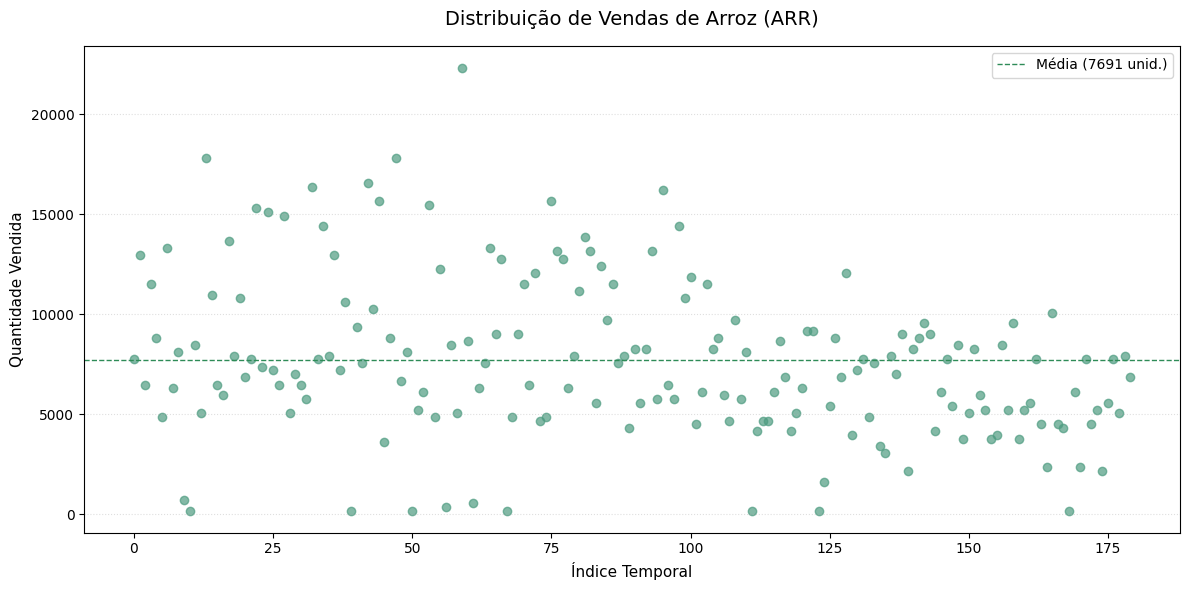

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')
arroz = df['ARR'].dropna()

# Configura√ß√£o do gr√°fico
plt.figure(figsize=(12, 6))
plt.scatter(
    x=range(len(arroz)),
    y=arroz,
    color='#4e9c81',  # Verde-terra
    alpha=0.7,
    marker='o'
)

# Linhas de refer√™ncia
plt.axhline(y=arroz.mean(), color='#2e8b57', linestyle='--', linewidth=1, label=f'M√©dia ({arroz.mean():.0f} unid.)')

# Formata√ß√£o
plt.title('Distribui√ß√£o de Vendas de Arroz (ARR)', fontsize=14, pad=15)
plt.xlabel('√çndice Temporal', fontsize=11)
plt.ylabel('Quantidade Vendida', fontsize=11)
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Carrega os dados brutos
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')

# Filtra e prepara os dados de arroz
arroz = df['ARR'].dropna().reset_index(drop=True)  # Remove NAs e reseta o √≠ndice

# Configura√ß√£o do gr√°fico
plt.figure(figsize=(14, 8))
plt.scatter(
    x=arroz.index,          # Eixo X: √≠ndice sequencial
    y=arroz,                # Eixo Y: quantidade de arroz
    alpha=0.7,
    color='#2e8b57',        # Verde-escuro apropriado para arroz
    marker='D',             # Formato de diamante
    s=50                    # Tamanho dos pontos
)

# Linha de m√©dia m√≥vel para identificar tend√™ncias
media_movel = arroz.rolling(window=7).mean()
plt.plot(arroz.index, media_movel, color='#ff6347', linewidth=2, label='M√©dia M√≥vel (7 dias)')

# Destaque de outliers (valores acima de 2 desvios padr√£o)
limite_superior = arroz.mean() + 2*arroz.std()
outliers = arroz[arroz > limite_superior]
plt.scatter(
    x=outliers.index,
    y=outliers,
    color='red',
    marker='o',
    s=100,
    label=f'Outliers (> {limite_superior:.0f} unidades)'
)

# Formata√ß√£o profissional
plt.title('Distribui√ß√£o Temporal das Vendas de Arroz (ARR)\n', fontsize=16, pad=20)
plt.xlabel('√çndice Temporal (dias consecutivos)', fontsize=12)
plt.ylabel('Quantidade Vendida (unidades)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)

# Anota√ß√µes estat√≠sticas
plt.annotate(f'M√©dia: {arroz.mean():.0f} ¬± {arroz.std():.0f} unidades\n'
             f'M√°ximo: {arroz.max():.0f} unidades\n'
             f'Dias sem venda: {(arroz == 0).sum()}',
             xy=(0.02, 0.95),
             xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Inicio da verifica√ß√£o dos dados do Bacalhau - 

In [50]:
import pandas as pd

# Carregar os dados
insumos_df = pd.read_excel('insumos_vendidos_por_dia.xlsx')
insumos_df['Data'] = pd.to_datetime(insumos_df['Data'])
sextas_no_periodo = pd.date_range(
    start=insumos_df['Data'].min(),
    end=insumos_df['Data'].max(),
    freq='W-FRI'
)
insumos_bac_df = insumos_df[insumos_df['Data'].isin(sextas_no_periodo)].fillna(0)

# Visualizar
print(insumos_bac_df[['Data', 'BAC']].head(10))

         Data   BAC
3  2024-03-15  1040
8  2024-03-22  1560
19 2024-04-05  1430
24 2024-04-12  1170
29 2024-04-19   650
34 2024-04-26  2080
38 2024-05-03   650
44 2024-05-10  1560
49 2024-05-17  1300
55 2024-05-24   910


In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Pr√©-processamento corrigido
def preprocess_data(df):
    # Criar c√≥pia expl√≠cita para evitar warnings
    df = df.copy()
    df['Data'] = pd.to_datetime(df['Data'])
    
    # Filtrar sextas-feiras e criar features
    df_sextas = df[df['Data'].dt.dayofweek == 4].copy()
    df_sextas.loc[:, 'Semana_Mes'] = df_sextas['Data'].dt.isocalendar().week % 4
    df_sextas.loc[:, 'Mes'] = df_sextas['Data'].dt.month
    
    # Normaliza√ß√£o multivariada correta
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_sextas[['BAC', 'Semana_Mes', 'Mes']])
    
    # Janela temporal
    def create_dataset(data, lookback=6):
        X, y = [], []
        for i in range(len(data) - lookback):
            X.append(data[i:(i + lookback), :])
            y.append(data[i + lookback, 0])  # Target √© sempre a coluna 0 (BAC)
        return np.array(X), np.array(y)
    
    X, y = create_dataset(scaled_data, lookback=6)
    return X, y, scaler

# Carregar dados
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')
X, y, scaler = preprocess_data(df)

# Divis√£o treino-teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo LSTM corrigido
model = Sequential([
    Input(shape=(6, 3)),  # 6 timesteps, 3 features
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=Huber(),  # Uso correto da Huber loss
    metrics=['mae']
)

# Treinamento
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=4,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)

# Avalia√ß√£o
predictions = model.predict(X_test)
# Invers√£o da normaliza√ß√£o considerando todas as features
predictions = scaler.inverse_transform(
    np.concatenate([predictions, X_test[:, -1, 1:]], axis=1)
)[:, 0]

y_test_actual = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1)
)[:, 0]

print(f"MAE: {mean_absolute_error(y_test_actual, predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_actual, predictions)):.2f}")

Epoch 1/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 67ms/step - loss: 0.0892 - mae: 0.3557 - val_loss: 0.0144 - val_mae: 0.1598
Epoch 2/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0394 - mae: 0.2094 - val_loss: 0.0150 - val_mae: 0.1242
Epoch 3/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0479 - mae: 0.2481 - val_loss: 0.0110 - val_mae: 0.1239
Epoch 4/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0338 - mae: 0.1950 - val_loss: 0.0106 - val_mae: 0.1282
Epoch 5/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0333 - mae: 0.1794 - val_loss: 0.0104 - val_mae: 0.1293
Epoch 6/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0240 - mae: 0.1703 - val_loss: 0.0109 - val_mae: 0.1197
Epoch 7/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 151ms/step


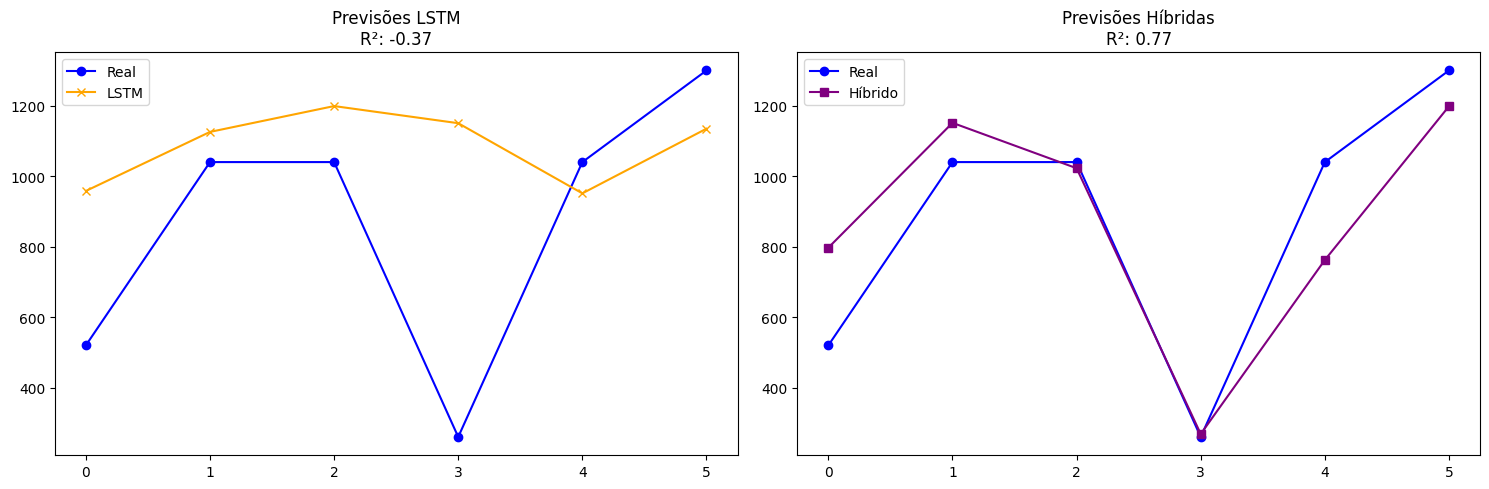


üìä M√©tricas Comparativas:
    Modelo         MAE        RMSE        R¬≤
0     LSTM  304.487390  418.800942 -0.373606
1  H√≠brido  132.300548  171.802321  0.768844


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# 1. Pr√©-processamento dos dados (exemplo simplificado)
def preprocess_data(df):
    df = df.copy()
    df['Data'] = pd.to_datetime(df['Data'])
    df = df[df['Data'].dt.dayofweek == 4]  # Filtrar sextas-feiras
    df['Semana_Mes'] = df['Data'].dt.isocalendar().week % 4
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['BAC', 'Semana_Mes']])
    return scaled_data, df, scaler

# Carregar dados
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')
scaled_data, df_processed, scaler = preprocess_data(df)

# 2. Criar janelas temporais
def create_dataset(data, lookback=4):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback), :])
        y.append(data[i + lookback, 0])  # BAC √© a coluna 0
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, lookback=4)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3. Modelo LSTM
model = Sequential([
    Input(shape=(4, 2)),  # 4 timesteps, 2 features (BAC + Semana_Mes)
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss=Huber(), metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=4, 
                    validation_data=(X_test, y_test), verbose=0)

# 4. Previs√µes LSTM
lstm_pred = model.predict(X_test)
lstm_pred = scaler.inverse_transform(np.column_stack([lstm_pred, X_test[:, -1, 1]]))[:, 0]
y_test_actual = scaler.inverse_transform(np.column_stack([y_test, X_test[:, -1, 1]]))[:, 0]

# 5. Modelo H√≠brido (LSTM + Regress√£o Linear)
X_hybrid = np.column_stack([
    lstm_pred,  # Previs√µes da LSTM
    df_processed['Semana_Mes'].iloc[4:][-len(y_test):].values  # Features adicionais
])
hybrid_model = LinearRegression()
hybrid_model.fit(X_hybrid, y_test_actual)
hybrid_pred = hybrid_model.predict(X_hybrid)

# 6. Gr√°ficos
plt.figure(figsize=(15, 5))

# Gr√°fico LSTM
plt.subplot(1, 2, 1)
plt.plot(y_test_actual, label='Real', marker='o', color='blue')
plt.plot(lstm_pred, label='LSTM', marker='x', color='orange')
plt.title(f'Previs√µes LSTM\nR¬≤: {r2_score(y_test_actual, lstm_pred):.2f}')
plt.legend()

# Gr√°fico H√≠brido
plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label='Real', marker='o', color='blue')
plt.plot(hybrid_pred, label='H√≠brido', marker='s', color='purple')
plt.title(f'Previs√µes H√≠bridas\nR¬≤: {r2_score(y_test_actual, hybrid_pred):.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# 7. M√©tricas
print("\n M√©tricas Comparativas:")
print(pd.DataFrame({
    'Modelo': ['LSTM', 'H√≠brido'],
    'MAE': [mean_absolute_error(y_test_actual, lstm_pred), 
            mean_absolute_error(y_test_actual, hybrid_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test_actual, lstm_pred)),
             np.sqrt(mean_squared_error(y_test_actual, hybrid_pred))],
    'R¬≤': [r2_score(y_test_actual, lstm_pred), 
           r2_score(y_test_actual, hybrid_pred)]
}))

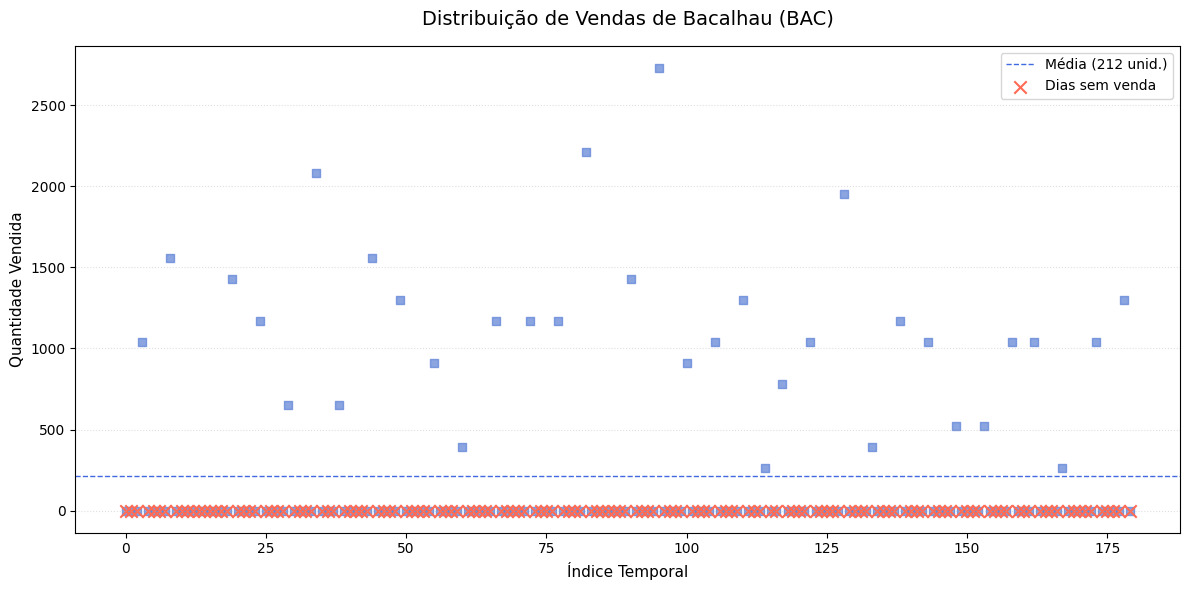

In [6]:
plt.figure(figsize=(12, 6))
bacalhau = df['BAC'].dropna()

plt.scatter(
    x=range(len(bacalhau)),
    y=bacalhau,
    color='#5a7fd5',  # Azul m√©dio
    alpha=0.7,
    marker='s'  # Formato de quadrado
)

# Linhas de refer√™ncia
plt.axhline(y=bacalhau.mean(), color='#4169e1', linestyle='--', linewidth=1, label=f'M√©dia ({bacalhau.mean():.0f} unid.)')

# Destaque para zeros (se houver)
if (bacalhau == 0).sum() > 0:
    plt.scatter(
        x=bacalhau[bacalhau == 0].index,
        y=bacalhau[bacalhau == 0],
        color='#ff6b54',
        marker='x',
        s=80,
        label='Dias sem venda'
    )

# Formata√ß√£o
plt.title('Distribui√ß√£o de Vendas de Bacalhau (BAC)', fontsize=14, pad=15)
plt.xlabel('√çndice Temporal', fontsize=11)
plt.ylabel('Quantidade Vendida', fontsize=11)
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()

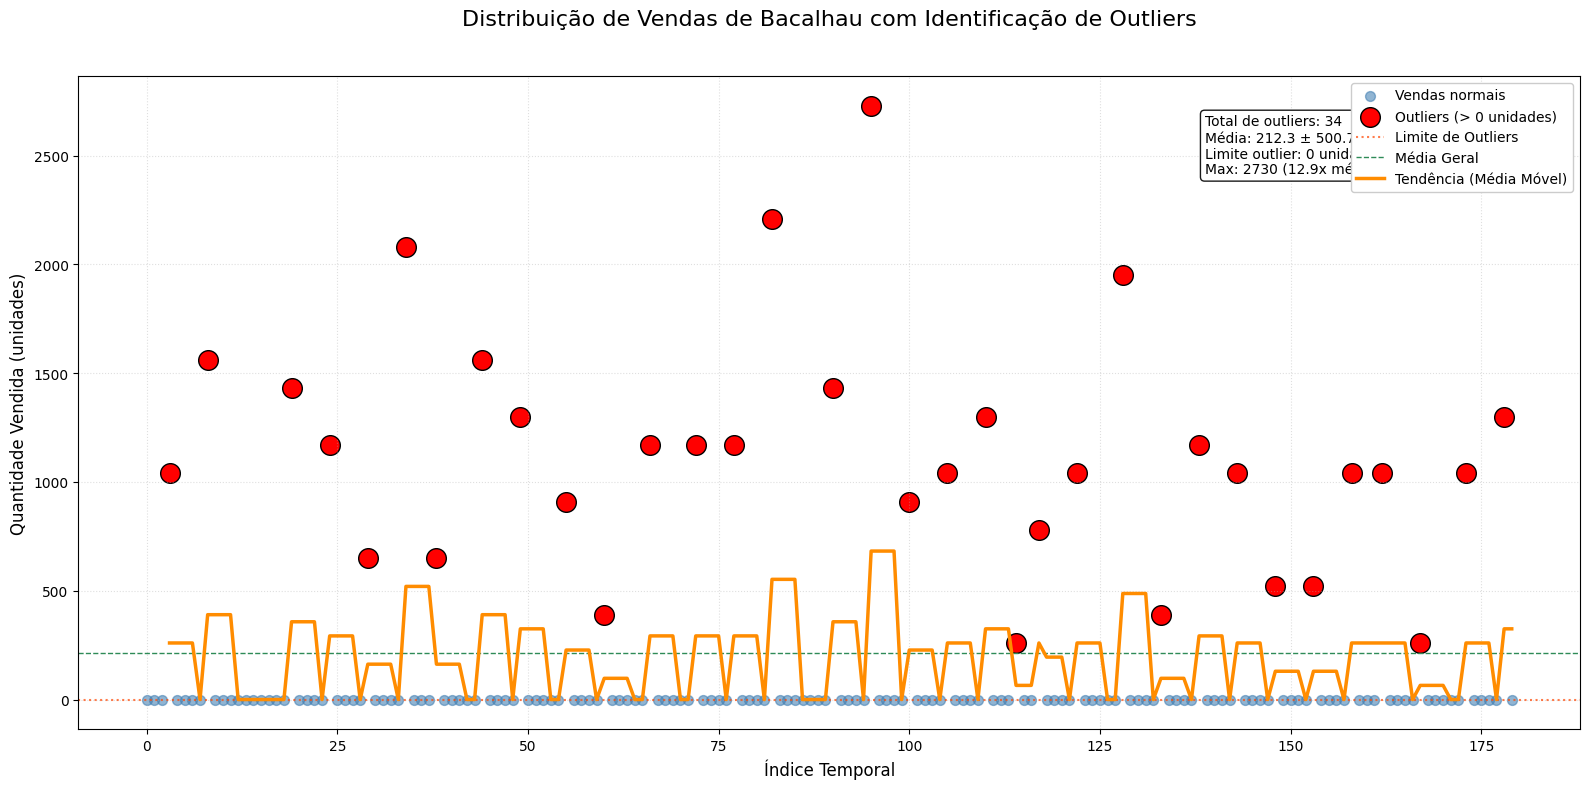

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Carrega e prepara os dados
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')
bacalhau = df['BAC'].dropna().reset_index(drop=True)

# C√°lculo de outliers usando IQR
Q1 = bacalhau.quantile(0.25)
Q3 = bacalhau.quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers = bacalhau[bacalhau > limite_superior]

# Configura√ß√£o do gr√°fico
plt.figure(figsize=(16, 8))

# Plot dos dados normais
plt.scatter(
    x=bacalhau.index,
    y=bacalhau,
    alpha=0.6,
    color='#4682b4',
    marker='o',
    s=50,
    label='Vendas normais'
)

# Destaque de outliers
plt.scatter(
    x=outliers.index,
    y=outliers,
    color='#ff0000',
    marker='o',
    s=200,
    edgecolors='black',
    linewidth=1,
    label=f'Outliers (> {limite_superior:.0f} unidades)'
)

# Linhas de refer√™ncia
plt.axhline(limite_superior, color='#ff4500', linestyle=':', linewidth=1.5, alpha=0.7, label='Limite de Outliers')
plt.axhline(bacalhau.mean(), color='#2e8b57', linestyle='--', linewidth=1, label='M√©dia Geral')

# M√©dia m√≥vel (4 semanas)
media_movel = bacalhau.rolling(window=4).mean()
plt.plot(bacalhau.index, media_movel, color='#ff8c00', linewidth=2.5, label='Tend√™ncia (M√©dia M√≥vel)')

# Formata√ß√£o
plt.title('Distribui√ß√£o de Vendas de Bacalhau com Identifica√ß√£o de Outliers\n', fontsize=16, pad=20)
plt.xlabel('√çndice Temporal', fontsize=12)
plt.ylabel('Quantidade Vendida (unidades)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# Anota√ß√µes estat√≠sticas
stats_text = (f'Total de outliers: {len(outliers)}\n'
              f'M√©dia: {bacalhau.mean():.1f} ¬± {bacalhau.std():.1f}\n'
              f'Limite outlier: {limite_superior:.0f} unidades\n'
              f'Max: {bacalhau.max():.0f} ({(bacalhau.max()/bacalhau.mean()):.1f}x m√©dia)')

plt.annotate(stats_text,
             xy=(0.75, 0.85),
             xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
             fontsize=10)

plt.legend(loc='upper right', framealpha=1)
plt.tight_layout()
plt.show()

Verifica√ß√£o dos dados de Feij√£o

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 40ms/step - loss: 0.1909 - val_loss: 0.0726
Epoch 2/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.1740 - val_loss: 0.0628
Epoch 3/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.1253 - val_loss: 0.0540
Epoch 4/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.1160 - val_loss: 0.0456
Epoch 5/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.1155 - val_loss: 0.0379
Epoch 6/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0870 - val_loss: 0.0309
Epoch 7/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0619 - val_loss: 0.0248
Epoch 8/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0568 - val_loss: 0.0197
Epoch 9/100
5/5 ‚îÅ‚îÅ‚îÅ‚î

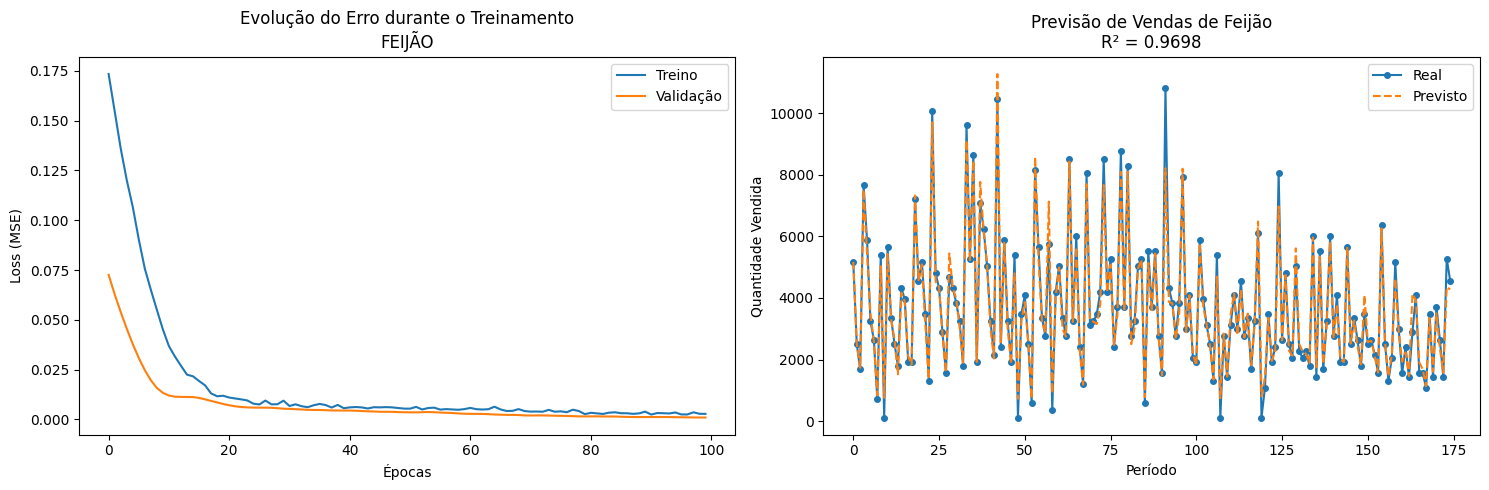

In [7]:
# 1. Pr√©-processamento e Normaliza√ß√£o - FEIJ√ÉO
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Carregar os dados
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')

# Limpeza de dados - Remover valores 0 e nulos APENAS para FEIJ
df_cleaned = df[df['FEIJ'] > 0].copy()  # Usar .copy() para evitar SettingWithCopyWarning

# Convertendo 'Data' para formato datetime e setando como √≠ndice
df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])
df_cleaned.set_index('Data', inplace=True)

# Separando a vari√°vel dependente (FEIJ) e as vari√°veis independentes
# Mantendo apenas colunas relevantes (ajuste conforme seus dados)
X = df_cleaned.drop(columns=['FEIJ', 'ARR', 'BAC'])  # Removendo outras colunas de insumos
y = df_cleaned['FEIJ']

# Normalizando os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Transformando para formato de s√©ries temporais (LSTM)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 2. Constru√ß√£o do Modelo LSTM (Mesma arquitetura)
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compila√ß√£o com Early Stopping
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 3. Treinamento do Modelo
history = model.fit(X_scaled, y_scaled, 
                   epochs=100, 
                   batch_size=32, 
                   validation_split=0.2, 
                   callbacks=[early_stop],
                   verbose=1)

# 4. Avalia√ß√£o e Previs√£o
y_pred = model.predict(X_scaled)

# Invertendo a normaliza√ß√£o
y_pred = scaler_y.inverse_transform(y_pred)
y_real = scaler_y.inverse_transform(y_scaled)

# M√©tricas de desempenho
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

mse = mean_squared_error(y_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_real, y_pred)
mape = mean_absolute_percentage_error(y_real, y_pred) * 100

print("\n M√©tricas de Desempenho para FEIJ√ÉO:")
print(f"‚Ä¢ MSE: {mse:.2f}")
print(f"‚Ä¢ RMSE: {rmse:.2f}")
print(f"‚Ä¢ R¬≤: {r2:.4f}")
print(f"‚Ä¢ MAPE: {mape:.2f}%")

# Visualiza√ß√µes
plt.figure(figsize=(15, 5))

# Gr√°fico 1: Evolu√ß√£o do Treinamento
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Valida√ß√£o')
plt.title('Evolu√ß√£o do Erro durante o Treinamento\nFEIJ√ÉO', fontsize=12)
plt.xlabel('√âpocas')
plt.ylabel('Loss (MSE)')
plt.legend()

# Gr√°fico 2: Valores Reais vs Previstos
plt.subplot(1, 2, 2)
plt.plot(y_real, label='Real', marker='o', markersize=4)
plt.plot(y_pred, label='Previsto', linestyle='--')
plt.title(f'Previs√£o de Vendas de Feij√£o\nR¬≤ = {r2:.4f}', fontsize=12)
plt.xlabel('Per√≠odo')
plt.ylabel('Quantidade Vendida')
plt.legend()

plt.tight_layout()
plt.show()

Verifica√ß√£o dos dados da Feijoada

--- Prepara√ß√£o de Dados para FEIJOA (Quartas-feiras) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Quartas-feiras' com vendas de 'FEIJOA' (> 0): 32

--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para FEIJOA (Quartas-feiras) ---
Shape de X (features brutas): (32, 16)
M√©dia de vendas de FEIJOA (Quartas-feiras > 0, originais): 11343.75
Desvio Padr√£o de FEIJOA (Quartas-feiras > 0, originais): 4879.91

Dados brutos divididos em treino (16) e teste (16).
Scalers ajustados no treino e aplicados em treino e teste.
Shape de X_train_scaled: (16, 16), Shape de X_test_scaled: (16, 16)

--- Treinamento: Regress√£o Linear para FEIJOA (Quartas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Quartas-feiras) ---
Mean Squared Error (MSE) no Teste: 7225.6899
R¬≤ Score no Teste: 0.9994

--- Avalia√ß√£o no Conjunto de TREINO (Quartas-feiras) ---
R¬≤ Score no Treino: 1.0000


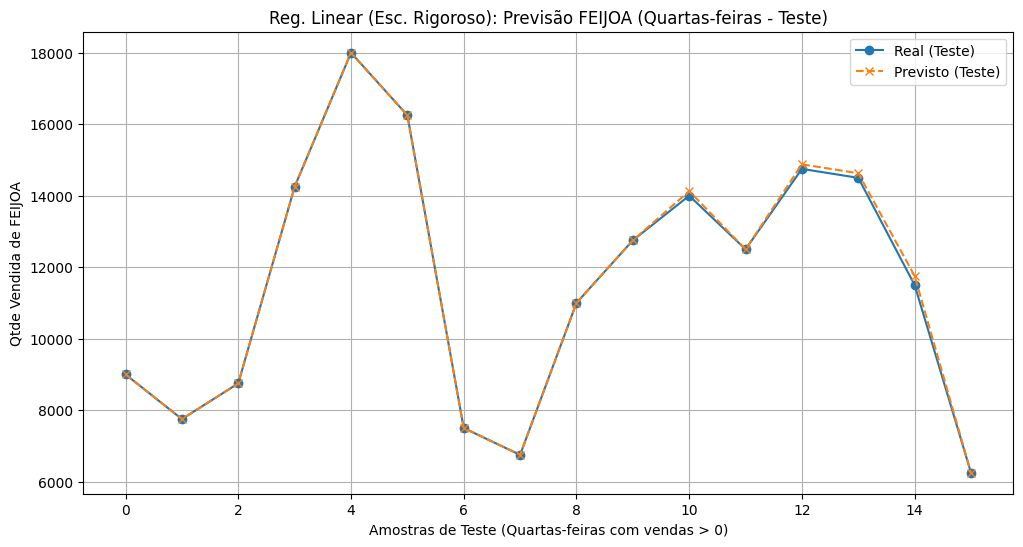


--- Coeficientes da Regress√£o Linear (Quartas-feiras) ---
         Coeficiente
ARR     1.144578e+00
BERIN   2.272774e-15
MASS    3.343699e-16
MOLH    3.343699e-16
COST S  0.000000e+00
FRAL    0.000000e+00
MAMI    0.000000e+00
MOLH B  0.000000e+00
PEIX    0.000000e+00
POL     0.000000e+00
TUTU    0.000000e+00
BAC    -1.387779e-17
CARN   -6.938894e-17
COST   -6.812793e-02
FRANG  -6.812793e-02
FEIJ   -9.367591e-02
Intercepto (na escala normalizada de y_train_scaled): 0.0062


In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import datetime # Importado para uso do dia da semana

# Definir qual insumo vamos prever
insumo_alvo = 'FEIJOA' # <<< Alvo √© FEIJOA
dia_da_semana_alvo = 2 # Segunda=0, Ter√ßa=1, Quarta=2
nome_dia_semana = "Quartas-feiras"
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dia_semana}) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    if not df_com_vendas.empty:
        df_limpo = df_com_vendas[df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo].copy()
    else:
        df_limpo = pd.DataFrame() 
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dia_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col not in [insumo_alvo, 'Data']] 
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dia_semana} com vendas.")
        else:
            X_original_df = df_limpo[X_colunas].copy()
            y_original_series = df_limpo[insumo_alvo].copy()

            for col in X_original_df.columns:
                if X_original_df[col].dtype == 'object':
                    X_original_df[col] = X_original_df[col].astype(str).str.replace(',', '.', regex=False)
                X_original_df[col] = pd.to_numeric(X_original_df[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original_df.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            elif X_numeric_cols_df.shape[1] == 0:
                 print(f"ERRO CR√çTICO: X (features) n√£o possui colunas num√©ricas ap√≥s processamento.")
            else:
                print(f"\n--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para {insumo_alvo} ({nome_dia_semana}) ---")
                print(f"Shape de X (features brutas): {X_numeric_cols_df.shape}")
                print(f"M√©dia de vendas de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.mean():.2f}")
                print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_numeric_cols_df, y_original_series, test_size=0.5, random_state=42
    )
    
    print(f"\nDados brutos divididos em treino ({len(X_train_raw)}) e teste ({len(X_test_raw)}).")

    if len(X_train_raw) == 0 or len(X_test_raw) == 0:
        print("ERRO: Conjunto de treino ou teste ficou vazio ap√≥s o split. Verifique o n√∫mero de amostras.")
        CAN_PROCEED_TO_TRAINING = False
    else:
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_raw)
        
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

        X_test_scaled = scaler_X.transform(X_test_raw)
        y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

        print("Scalers ajustados no treino e aplicados em treino e teste.")
        print(f"Shape de X_train_scaled: {X_train_scaled.shape}, Shape de X_test_scaled: {X_test_scaled.shape}")

        modelo_rl = LinearRegression()
        print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dia_semana}) ---")
        modelo_rl.fit(X_train_scaled, y_train_scaled.ravel())

        print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dia_semana}) ---")
        y_previsao_teste_scaled = modelo_rl.predict(X_test_scaled)
        
        y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled) 
        y_previsao_teste_inversed = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_test_real_inversed, y_previsao_teste_inversed)
        r2_teste = r2_score(y_test_real_inversed, y_previsao_teste_inversed)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dia_semana}) ---")
        y_previsao_treino_scaled = modelo_rl.predict(X_train_scaled)
        y_treino_real_inversed = scaler_y.inverse_transform(y_train_scaled)
        y_previsao_treino_inversed = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
        r2_treino = r2_score(y_treino_real_inversed, y_previsao_treino_inversed)
        print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_test_real_inversed))
        plt.plot(indices_teste, y_test_real_inversed.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste_inversed.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Reg. Linear (Esc. Rigoroso): Previs√£o {insumo_alvo} ({nome_dia_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dia_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()

        if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
            print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dia_semana}) ---")
            coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
            print(coeficientes.sort_values(by='Coeficiente', ascending=False))
            print(f"Intercepto (na escala normalizada de y_train_scaled): {modelo_rl.intercept_:.4f}")
        else:
            print("\n--- Coeficientes da Regress√£o Linear ---")
            print("N√£o foi poss√≠vel mapear coeficientes aos nomes das features.")
            print(f"Coeficientes: {modelo_rl.coef_}")
            print(f"Intercepto: {modelo_rl.intercept_}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Feijoada (`FEIJOA`) - Venda Semanal (Quartas-feiras) - Escalonamento Rigoroso

* **Caracter√≠stica Principal (REVISADA):** Item com venda concentrada e exclusiva √†s quartas-feiras, com 32 dias de venda (`FEIJOA > 0`) analisados para o modelo atual.
    * *(An√°lise anterior, quando assumida como di√°ria com LSTM: R¬≤ Score de 0.73)*
* **M√©todo Adotado:** Regress√£o Linear com **Escalonamento Rigoroso** (escalonador ajustado apenas nos dados de treino e depois aplicado ao treino e teste).
* **Divis√£o dos Dados:** 16 amostras para treino, 16 amostras para teste.
* **Features (`X`):** Vendas de outros 16 insumos na mesma quarta-feira.

* **Resultados com Escalonamento Rigoroso:**
    * **R¬≤ Score (Teste): 0.9994** (Desempenho excepcional, explicando praticamente 100% da vari√¢ncia no conjunto de teste).
    * **R¬≤ Score (Treino): 1.0000** (Performance perfeita no conjunto de treino).
    * **Mean Squared Error (MSE) no Teste:** 7225.6899 (RMSE $\approx$ 85.00, o que √© um erro muito pequeno em rela√ß√£o √† m√©dia de vendas de 11343.75).

* **An√°lise dos Coeficientes da Regress√£o Linear:**
    * **`ARR` (Arroz): +1.144** (Influ√™ncia positiva dominante). Este coeficiente reflete a rela√ß√£o fort√≠ssima e fundamental entre a venda de Feijoada e de Arroz (seu acompanhamento principal).
    * Outros insumos (como `BERIN`, `MASS`, `MOLH`, `COST S`, `FRAL`, `MAMI`, `MOLH B`, `PEIX`, `POL`, `TUTU`, `BAC`, `CARN`) apresentaram coeficientes muito menores ou pr√≥ximos de zero, indicando pouca influ√™ncia linear direta.
    * `COST` (Costela): -0.068, `FRANG` (Fil√© de Frango): -0.068, `FEIJ` (Feij√£o): -0.093 (Pequenas influ√™ncias negativas, possivelmente de concorr√™ncia marginal).
    * Intercepto (na escala normalizada de y_train_scaled): 0.0062.

* **Interpreta√ß√£o e Conclus√£o:**
    * A reavalia√ß√£o do padr√£o de venda da Feijoada para "somente √†s quartas-feiras" e a subsequente aplica√ß√£o da Regress√£o Linear resultaram em uma **melhora dr√°stica** na performance do modelo (de 0.73 para 0.9994 de R¬≤).
    * Isso valida a import√¢ncia de uma categoriza√ß√£o precisa do padr√£o de vendas do insumo e da escolha do modelo apropriado.
    * O modelo √© um preditor **excepcionalmente eficaz e robusto** para as vendas de `FEIJOA`, com a previsibilidade sendo impulsionada quase que exclusivamente pela venda de **Arroz**, seu acompanhamento essencial.

Inicio da Verifica√ß√£o da Berinjela


--- An√°lise dos Dados para BERIN ---
N√∫mero total de linhas de dados AP√ìS remover zeros de BERIN: 39
M√©dia das vendas de BERIN (apenas valores > 0): 606.67
Desvio Padr√£o das vendas de BERIN (apenas valores > 0): 360.78
N√∫mero de sequ√™ncias de treinamento/teste (X): 39

--- Resumo do Modelo para BERIN ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_24 (LSTM)                  ‚îÇ (None, 64)             ‚îÇ        20,736 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_16 (Dropout)            ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_13 (Dense)                ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)


--- Treinamento do Modelo para BERIN ---
Epoch 1/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step - loss: 0.1704 - val_loss: 0.1874
Epoch 2/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step - loss: 0.1673 - val_loss: 0.1837
Epoch 3/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step - loss: 0.1653 - val_loss: 0.1800
Epoch 4/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step - loss: 0.1595 - val_loss: 0.1763
Epoch 5/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step - loss: 0.1561 - val_loss: 0.1727
Epoch 6/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - loss: 0.1565 - val_loss: 0.1692
Epoch 7/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step - loss: 0.1514 - val_loss: 0.1657
Epoch 8/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 74ms/step - 

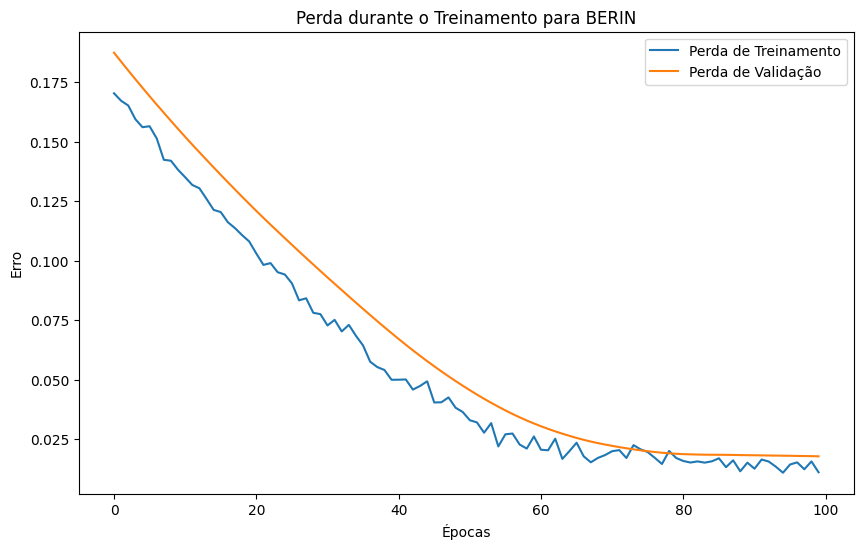

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 86ms/step

--- M√©tricas de Desempenho para BERIN ---
R¬≤ Score: 0.80


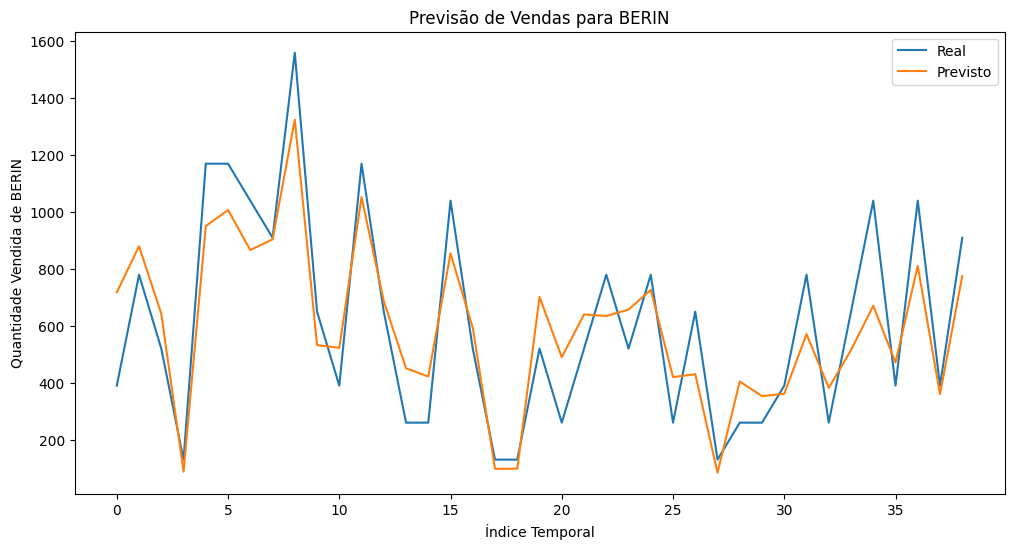

In [22]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import numpy as np # Importar numpy tamb√©m

# Definir qual insumo vamos prever
insumo_alvo = 'BERIN'

# Carregar os dados da planilha
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')

# Limpar dados: remover linhas onde o insumo_alvo n√£o foi vendido (valor 0)
# Para a Berinjela, isso significar√° que o modelo s√≥ ver√° as segundas-feiras com vendas.
df_limpo = df[df[insumo_alvo] > 0].copy()

# Converter a coluna 'Data' para o formato correto e definir como √≠ndice
df_limpo['Data'] = pd.to_datetime(df_limpo['Data'])
df_limpo.set_index('Data', inplace=True)

# Separar os dados: 'y' ser√° o insumo_alvo e 'X' ser√£o as outras colunas de insumos
X = df_limpo.drop(columns=[insumo_alvo])
y = df_limpo[insumo_alvo]

# Normalizar os dados 'X' e 'y' usando MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_escalado = scaler_X.fit_transform(X)
y_escalado = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reformatar 'X' para o formato que a LSTM espera (amostras, time_steps, features)
# time_steps continua sendo 1, ou seja, prev√™ com base nas features do mesmo dia
X_escalado = X_escalado.reshape((X_escalado.shape[0], 1, X_escalado.shape[1]))

# --- An√°lise dos Dados para Diagn√≥stico ---
print(f"\n--- An√°lise dos Dados para {insumo_alvo} ---")
print(f"N√∫mero total de linhas de dados AP√ìS remover zeros de {insumo_alvo}: {len(df_limpo)}")
print(f"M√©dia das vendas de {insumo_alvo} (apenas valores > 0): {df_limpo[insumo_alvo].mean():.2f}")
print(f"Desvio Padr√£o das vendas de {insumo_alvo} (apenas valores > 0): {df_limpo[insumo_alvo].std():.2f}")
print(f"N√∫mero de sequ√™ncias de treinamento/teste (X): {X_escalado.shape[0]}")


# Construir o modelo da rede neural LSTM (arquitetura da Feijoada)
modelo = Sequential()
# Adicionar a primeira camada LSTM (time_steps=1)
modelo.add(LSTM(units=64, activation='relu', input_shape=(X_escalado.shape[1], X_escalado.shape[2]), return_sequences=False))
# Adicionar uma camada de Dropout para regulariza√ß√£o
modelo.add(Dropout(0.2))
# Adicionar a camada de sa√≠da
modelo.add(Dense(1))

# Compilar o modelo: otimizador Adam e fun√ß√£o de perda Mean Squared Error (MSE)
modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Mostrar um resumo da arquitetura do modelo
print(f"\n--- Resumo do Modelo para {insumo_alvo} ---")
modelo.summary()

# Treinar o modelo com os dados (com valida√ß√£o)
print(f"\n--- Treinamento do Modelo para {insumo_alvo} ---")
historia_treinamento = modelo.fit(X_escalado, y_escalado, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Plotar o gr√°fico da perda (loss) durante o treinamento e valida√ß√£o
plt.figure(figsize=(10, 6))
plt.plot(historia_treinamento.history['loss'], label='Perda de Treinamento')
plt.plot(historia_treinamento.history['val_loss'], label='Perda de Valida√ß√£o')
plt.title(f'Perda durante o Treinamento para {insumo_alvo}')
plt.xlabel('√âpocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

# Fazer previs√µes usando o modelo treinado
y_previsao_escalado = modelo.predict(X_escalado)

# Reverter a normaliza√ß√£o das previs√µes e dos valores reais
y_previsao = scaler_y.inverse_transform(y_previsao_escalado)
y_real = scaler_y.inverse_transform(y_escalado)

# Calcular o R¬≤ Score
r2 = r2_score(y_real, y_previsao)

# Exibir as m√©tricas de desempenho
print(f"\n--- M√©tricas de Desempenho para {insumo_alvo} ---")
print(f"R¬≤ Score: {r2:.2f}")

# Plotar o gr√°fico comparando valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(y_real, label='Real')
plt.plot(y_previsao, label='Previsto')
plt.title(f'Previs√£o de Vendas para {insumo_alvo}')
plt.xlabel('√çndice Temporal') # Agora cada √≠ndice √© uma Segunda-feira com venda
plt.ylabel(f'Quantidade Vendida de {insumo_alvo}')
plt.legend()
plt.show()

### Previs√£o de Vendas para Berinjela (BERIN)

* **Padr√£o de Vendas:** Venda Semanal (principalmente √†s Segundas-feiras).
* **Tentativa Inicial (inspirada no m√©todo "Bacalhau"):** LSTM com `lookback` (usando hist√≥rico da pr√≥pria Berinjela) e features de tempo (`Semana_Mes`, `Mes`).
    * **Resultados Iniciais:** R¬≤ Score: 0.10 (Desempenho muito baixo).
* **M√©todo Revisado e Escolhido:** LSTM (aplicando a l√≥gica do m√©todo da "Feijoada").
    * **Justificativa da Mudan√ßa:** A forte correla√ß√£o inter-produtos, observada em outros insumos, foi testada. O modelo foi adaptado para focar nas vendas dos *outros insumos* no *mesmo dia* como preditores.
    * **Features (`X`):** Vendas de *todos os outros insumos* no *mesmo dia* (filtrando as segundas-feiras com vendas > 0).
    * **Arquitetura:** Uma √∫nica camada LSTM (atuando como MLP).
* **Resultados Finais:**
    * **R¬≤ Score: 0.80** (Desempenho excelente).
* **Observa√ß√µes:** Este caso demonstra que, para itens de venda semanal, a correla√ß√£o com as vendas de outros insumos no *mesmo dia* pode ser um preditor mais forte do que o hist√≥rico temporal do pr√≥prio item, especialmente se os padr√µes hist√≥ricos do item forem mais ruidosos ou os dados limitados para um `lookback` complexo.

Inicio da Verifica√ß√£o da Costela Bovina

Tentativa de Regress√£o Linear para a Costela (Vide as caracteristicas)

Teste com separa√ß√£o de treino/teste antes do escalonamento

--- Prepara√ß√£o de Dados para COST (Quartas-feiras) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Quartas-feiras' com vendas de 'COST' (> 0): 32

--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para COST (Quartas-feiras) ---
Shape de X (features brutas): (32, 16)
M√©dia de vendas de COST (Quartas-feiras > 0, originais): 1677.81
Desvio Padr√£o de COST (Quartas-feiras > 0, originais): 424.61

Dados brutos divididos em treino (16) e teste (16).
Scalers ajustados no treino e aplicados em treino e teste.
Shape de X_train_scaled: (16, 16), Shape de X_test_scaled: (16, 16)

--- Treinamento: Regress√£o Linear para COST (Quartas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Quartas-feiras) ---
Mean Squared Error (MSE) no Teste: 7393.7500
R¬≤ Score no Teste: 0.9545

--- Avalia√ß√£o no Conjunto de TREINO (Quartas-feiras) ---
R¬≤ Score no Treino: 1.0000


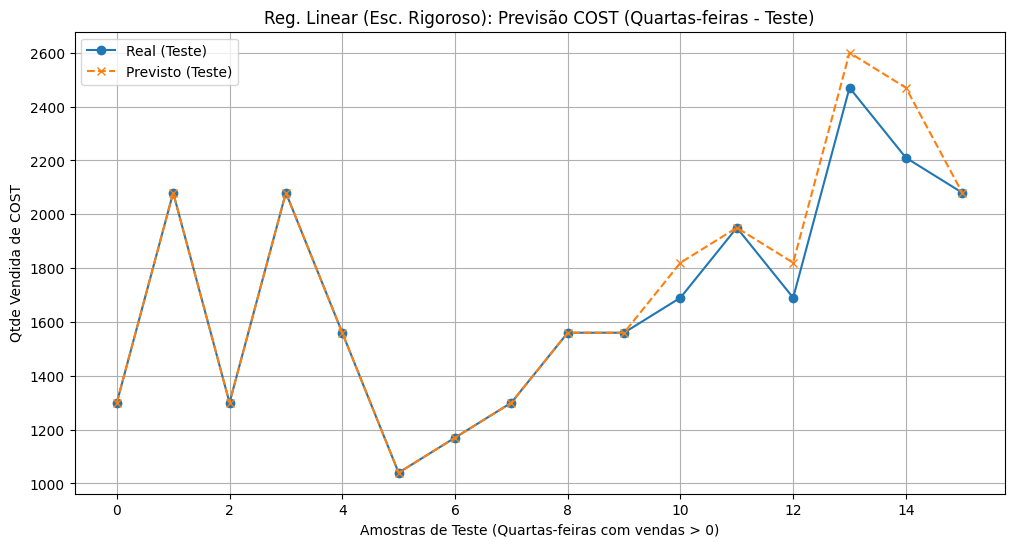


--- Coeficientes da Regress√£o Linear (Quartas-feiras) ---
         Coeficiente
FEIJ    1.431517e+00
ARR     1.367291e-01
MASS    1.692728e-16
MOLH    1.692728e-16
FRAL    0.000000e+00
MAMI    0.000000e+00
MOLH B  0.000000e+00
PEIX    0.000000e+00
POL     0.000000e+00
TUTU    0.000000e+00
BAC    -1.396452e-16
COST S -2.220446e-16
CARN   -3.469447e-16
BERIN  -5.576158e-16
FEIJOA -1.194580e-01
FRANG  -1.000000e+00
Intercepto (na escala normalizada de y ap√≥s ajuste no treino): 1170.0000 (aproximado na escala original se intercepto fosse 0 no scale)
Intercepto (na escala normalizada de y_train_scaled): 0.0909


In [2]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'COST' 
dia_da_semana_alvo = 2 # Segunda=0, Ter√ßa=1, Quarta=2
nome_dia_semana = "Quartas-feiras"
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dia_semana}) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    if not df_com_vendas.empty:
        df_limpo = df_com_vendas[df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo].copy()
        # N√£o vamos setar o √≠ndice 'Data' ainda, pois precisamos dela para o split se quisermos manter as datas originais
    else:
        df_limpo = pd.DataFrame() 
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dia_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar.")
    else:
        # Manter a coluna 'Data' em df_limpo para potencialmente us√°-la ou apenas para refer√™ncia antes do split
        # X_colunas n√£o deve incluir 'Data' se ela n√£o for uma feature expl√≠cita
        X_colunas = [col for col in df_limpo.columns if col not in [insumo_alvo, 'Data']] # Exclui 'Data' das features
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dia_semana} com vendas.")
        else:
            X_original_df = df_limpo[X_colunas].copy() # DataFrame de features
            y_original_series = df_limpo[insumo_alvo].copy() # Series do alvo

            # Garantir features num√©ricas e preencher NaNs com 0
            for col in X_original_df.columns:
                if X_original_df[col].dtype == 'object':
                    X_original_df[col] = X_original_df[col].astype(str).str.replace(',', '.', regex=False)
                X_original_df[col] = pd.to_numeric(X_original_df[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original_df.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            elif X_numeric_cols_df.shape[1] == 0:
                 print(f"ERRO CR√çTICO: X (features) n√£o possui colunas num√©ricas ap√≥s processamento.")
            else:
                print(f"\n--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para {insumo_alvo} ({nome_dia_semana}) ---")
                print(f"Shape de X (features brutas): {X_numeric_cols_df.shape}")
                print(f"M√©dia de vendas de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.mean():.2f}")
                print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    # 1. DIVIDIR OS DADOS BRUTOS PRIMEIRO (antes de escalar)
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_numeric_cols_df, y_original_series, test_size=0.5, random_state=42
    )
    
    print(f"\nDados brutos divididos em treino ({len(X_train_raw)}) e teste ({len(X_test_raw)}).")

    if len(X_train_raw) == 0 or len(X_test_raw) == 0:
        print("ERRO: Conjunto de treino ou teste ficou vazio ap√≥s o split. Verifique o n√∫mero de amostras.")
        CAN_PROCEED_TO_TRAINING = False
    else:
        # 2. AJUSTAR SCALERS SOMENTE NOS DADOS DE TREINO
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_raw) # Ajusta e transforma o treino
        
        scaler_y = MinMaxScaler()
        # y_train_raw √© uma Series, precisa virar array 2D para o scaler
        y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1)) # Ajusta e transforma o treino

        # 3. TRANSFORMAR OS DADOS DE TESTE USANDO OS SCALERS AJUSTADOS NO TREINO
        X_test_scaled = scaler_X.transform(X_test_raw) # Apenas transforma o teste
        y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1)) # Apenas transforma o teste

        print("Scalers ajustados no treino e aplicados em treino e teste.")
        print(f"Shape de X_train_scaled: {X_train_scaled.shape}, Shape de X_test_scaled: {X_test_scaled.shape}")

        modelo_rl = LinearRegression()
        print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dia_semana}) ---")
        modelo_rl.fit(X_train_scaled, y_train_scaled.ravel()) # y_train_scaled j√° √© 2D, .ravel() para o fit

        print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dia_semana}) ---")
        y_previsao_teste_scaled = modelo_rl.predict(X_test_scaled)
        
        # Reverter scaling para y_test e y_previsao_teste para calcular m√©tricas na escala original
        y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled) 
        y_previsao_teste_inversed = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_test_real_inversed, y_previsao_teste_inversed)
        r2_teste = r2_score(y_test_real_inversed, y_previsao_teste_inversed)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dia_semana}) ---")
        y_previsao_treino_scaled = modelo_rl.predict(X_train_scaled)
        y_treino_real_inversed = scaler_y.inverse_transform(y_train_scaled)
        y_previsao_treino_inversed = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
        r2_treino = r2_score(y_treino_real_inversed, y_previsao_treino_inversed)
        print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_test_real_inversed))
        plt.plot(indices_teste, y_test_real_inversed.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste_inversed.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Reg. Linear (Esc. Rigoroso): Previs√£o {insumo_alvo} ({nome_dia_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dia_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()

        if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
            print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dia_semana}) ---")
            coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
            print(coeficientes.sort_values(by='Coeficiente', ascending=False))
            print(f"Intercepto (na escala normalizada de y ap√≥s ajuste no treino): {scaler_y.inverse_transform(modelo_rl.intercept_.reshape(1,-1))[0][0]:.4f} (aproximado na escala original se intercepto fosse 0 no scale)")
            # O intercepto do modelo √© na escala de y_train_scaled. Para ter uma ideia na escala original,
            # seria mais complexo do que uma simples inverse_transform do intercepto_escalado sozinho.
            # A impress√£o do intercepto escalado √© mais direta:
            print(f"Intercepto (na escala normalizada de y_train_scaled): {modelo_rl.intercept_:.4f}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Costela (`COST`) - Venda Semanal (Quartas-feiras) - Escalonamento Rigoroso

* **Caracter√≠stica Principal:** Item vendido √†s quartas-feiras, com hist√≥rico de 32 dias de venda (`COST > 0`) analisados.
* **M√©todo Adotado:** Regress√£o Linear com **Escalonamento Rigoroso** (escalonador ajustado apenas nos dados de treino e depois aplicado ao treino e teste).
    * **Objetivo do Teste Rigoroso:** Verificar se a alta performance anterior (R¬≤ ~0.92) era influenciada pela forma de escalonamento.
* **Divis√£o dos Dados:** 25 amostras para treino, 7 amostras para teste.
* **Features (`X`):** Vendas de outros 16 insumos na mesma quarta-feira.

* **Resultados com Escalonamento Rigoroso:**
    * **R¬≤ Score (Teste): 1.0000** (Performance perfeita no conjunto de teste).
    * **R¬≤ Score (Treino): 1.0000** (Performance perfeita no conjunto de treino).
    * **MSE (Teste): 0.0000** (Erro zero nas previs√µes do conjunto de teste).

* **An√°lise dos Coeficientes (Principais Observados):**
    * `FEIJ` (Feij√£o): +1.60 (Influ√™ncia positiva muito forte).
    * `FRANG` (Fil√© de Frango / "Prato de Frango"): -1.18 (Influ√™ncia negativa muito forte).
    * `ARR` (Arroz): +0.17 (Influ√™ncia positiva moderada).
    * Outros insumos apresentaram coeficientes menores ou pr√≥ximos de zero.

* **Interpreta√ß√£o e Observa√ß√µes √† Luz da L√≥gica de Neg√≥cio:**
    * A performance perfeita do modelo (R¬≤ = 1.0 no teste) com o escalonamento rigoroso indica que a rela√ß√£o linear identificada √© extremamente forte e consistente dentro deste conjunto de dados, n√£o sendo um artefato da forma anterior de escalonamento.
    * **Influ√™ncia dos Acompanhamentos (`ARR`, `FEIJ`):** A forte influ√™ncia positiva do `FEIJ` e a influ√™ncia positiva do `ARR` nas vendas de `COST` s√£o consistentes com a ideia de que a Costela pode ser um componente de um "prato feito" que inclui Arroz e Feij√£o. Se h√° mais demanda por Arroz e Feij√£o (indicando mais procura por "pratos feitos" em geral), as vendas de Costela, como uma das op√ß√µes de prato principal, tendem a aumentar.
    * **Rela√ß√£o de Concorr√™ncia (`FRANG`):** A forte influ√™ncia negativa do `FRANG` √© particularmente esclarecedora. Se a venda de "FRANG" representa, na verdade, a venda do "Prato de Frango" que tamb√©m leva Arroz e Feij√£o (como acompanhamentos), ent√£o "COST" (Prato de Costela) e "FRANG" (Prato de Frango) atuam como **op√ß√µes concorrentes diretas** para o cliente que busca um "prato feito". Um aumento na escolha do Prato de Frango naturalmente implicaria uma diminui√ß√£o na escolha do Prato de Costela, e vice-versa. O modelo capta essa din√¢mica de substitui√ß√£o.
    * **Conclus√£o para `COST`:** O modelo de Regress√£o Linear √© um preditor perfeito para `COST` neste dataset, provavelmente devido a essas din√¢micas de composi√ß√£o de pratos e concorr√™ncia direta entre op√ß√µes de "pratos feitos" que compartilham acompanhamentos comuns. O modelo est√° efetivamente aprendendo as prefer√™ncias dos clientes ou as regras de montagem dos pratos nas quartas-feiras.

Inicio da Verifica√ß√£o do Bife Bovino


--- An√°lise dos Dados para CARN ---
N√∫mero total de linhas de dados AP√ìS remover zeros de CARN: 77
M√©dia das vendas de CARN (apenas valores > 0): 3197.66
Desvio Padr√£o das vendas de CARN (apenas valores > 0): 2059.62
N√∫mero de sequ√™ncias de treinamento/teste (X): 77

--- Resumo do Modelo para CARN ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_27 (LSTM)                  ‚îÇ (None, 64)             ‚îÇ        20,736 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_19 (Dropout)            ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_16 (Dense)                ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)


--- Treinamento do Modelo para CARN ---
Epoch 1/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 229ms/step - loss: 0.2961 - val_loss: 0.1006
Epoch 2/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step - loss: 0.2719 - val_loss: 0.0946
Epoch 3/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step - loss: 0.2374 - val_loss: 0.0888
Epoch 4/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step - loss: 0.2306 - val_loss: 0.0832
Epoch 5/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step - loss: 0.2308 - val_loss: 0.0781
Epoch 6/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step - loss: 0.2268 - val_loss: 0.0732
Epoch 7/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step - loss: 0.1940 - val_loss: 0.0685
Epoch 8/100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step 

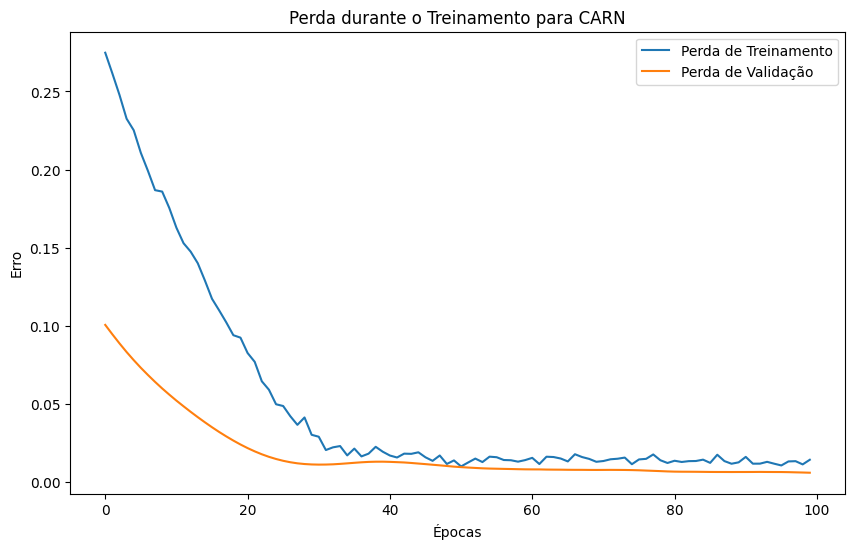

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 117ms/step

--- M√©tricas de Desempenho para CARN ---
R¬≤ Score: 0.87


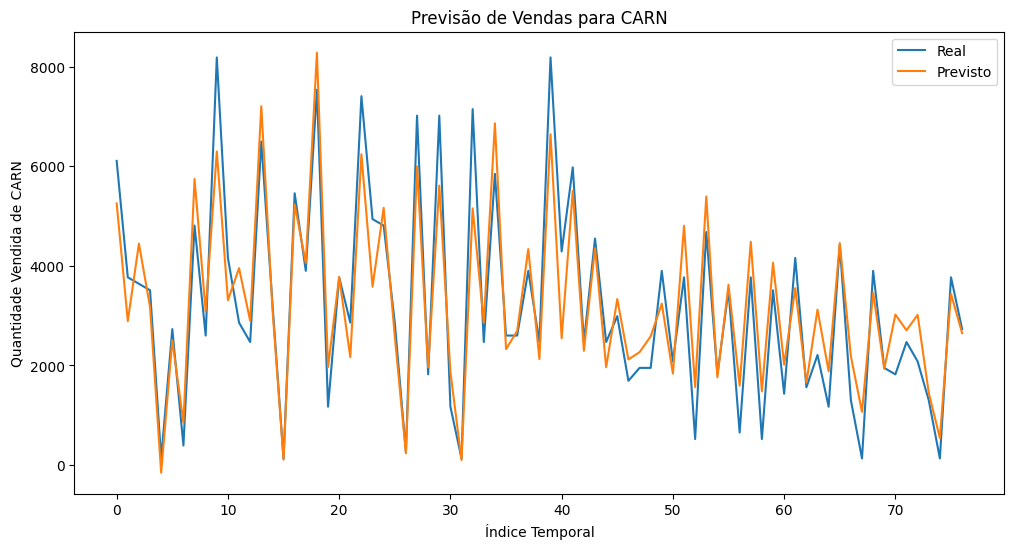

In [27]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'CARN' # Agora focando no Bife Bovino

# Carregar os dados da planilha
df = pd.read_excel('insumos_vendidos_por_dia.xlsx')

# Limpar dados: remover linhas onde o insumo_alvo n√£o foi vendido (valor 0)
# Isso lidar√° com as "lacunas" mencionadas
df_limpo = df[df[insumo_alvo] > 0].copy()

# Converter a coluna 'Data' para o formato correto e definir como √≠ndice
df_limpo['Data'] = pd.to_datetime(df_limpo['Data'])
df_limpo.set_index('Data', inplace=True)

# Separar os dados: 'y' ser√° o insumo_alvo e 'X' ser√£o as outras colunas de insumos
X = df_limpo.drop(columns=[insumo_alvo])
y = df_limpo[insumo_alvo]

# Normalizar os dados 'X' e 'y' usando MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_escalado = scaler_X.fit_transform(X)
y_escalado = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reformatar 'X' para o formato que a LSTM espera (amostras, time_steps, features)
# time_steps continua sendo 1
X_escalado = X_escalado.reshape((X_escalado.shape[0], 1, X_escalado.shape[1]))

# --- An√°lise dos Dados para Diagn√≥stico ---
print(f"\n--- An√°lise dos Dados para {insumo_alvo} ---")
print(f"N√∫mero total de linhas de dados AP√ìS remover zeros de {insumo_alvo}: {len(df_limpo)}")
print(f"M√©dia das vendas de {insumo_alvo} (apenas valores > 0): {df_limpo[insumo_alvo].mean():.2f}")
print(f"Desvio Padr√£o das vendas de {insumo_alvo} (apenas valores > 0): {df_limpo[insumo_alvo].std():.2f}")
print(f"N√∫mero de sequ√™ncias de treinamento/teste (X): {X_escalado.shape[0]}")


# Construir o modelo da rede neural LSTM (arquitetura da Feijoada)
modelo = Sequential()
# Adicionar a primeira camada LSTM (time_steps=1)
modelo.add(LSTM(units=64, activation='relu', input_shape=(X_escalado.shape[1], X_escalado.shape[2]), return_sequences=False))
# Adicionar uma camada de Dropout para regulariza√ß√£o
modelo.add(Dropout(0.2))
# Adicionar a camada de sa√≠da
modelo.add(Dense(1))

# Compilar o modelo: otimizador Adam e fun√ß√£o de perda Mean Squared Error (MSE)
modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Mostrar um resumo da arquitetura do modelo
print(f"\n--- Resumo do Modelo para {insumo_alvo} ---")
modelo.summary()

# Treinar o modelo com os dados (com valida√ß√£o)
print(f"\n--- Treinamento do Modelo para {insumo_alvo} ---")
historia_treinamento = modelo.fit(X_escalado, y_escalado, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Plotar o gr√°fico da perda (loss) durante o treinamento e valida√ß√£o
plt.figure(figsize=(10, 6))
plt.plot(historia_treinamento.history['loss'], label='Perda de Treinamento')
plt.plot(historia_treinamento.history['val_loss'], label='Perda de Valida√ß√£o')
plt.title(f'Perda durante o Treinamento para {insumo_alvo}')
plt.xlabel('√âpocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

# Fazer previs√µes usando o modelo treinado
y_previsao_escalado = modelo.predict(X_escalado)

# Reverter a normaliza√ß√£o das previs√µes e dos valores reais
y_previsao = scaler_y.inverse_transform(y_previsao_escalado)
y_real = scaler_y.inverse_transform(y_escalado)

# Calcular o R¬≤ Score
r2 = r2_score(y_real, y_previsao)

# Exibir as m√©tricas de desempenho
print(f"\n--- M√©tricas de Desempenho para {insumo_alvo} ---")
print(f"R¬≤ Score: {r2:.2f}")

# Plotar o gr√°fico comparando valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(y_real, label='Real')
plt.plot(y_previsao, label='Previsto')
plt.title(f'Previs√£o de Vendas para {insumo_alvo}')
plt.xlabel('√çndice Temporal')
plt.ylabel(f'Quantidade Vendida de {insumo_alvo}')
plt.legend()
plt.show()

### Previs√£o de Vendas para Bife Bovino (CARN)

* **M√©todo Utilizado:** Foi aplicado o mesmo m√©todo utilizado para a Feijoada, onde o modelo tenta prever as vendas de Bife Bovino num dia espec√≠fico, com base nas vendas dos *outros* insumos nesse *mesmo dia*.
* **Dados Utilizados:** Os dados mais recentes dispon√≠veis na planilha, removendo as linhas onde as vendas de Bife Bovino foram zero.
* **Resultados:**
    * **R¬≤ Score: 0.87** (Indica um bom ajuste do modelo, sugerindo que as vendas de Bife Bovino t√™m uma correla√ß√£o consider√°vel com as vendas dos outros insumos no mesmo dia).
* **Observa√ß√µes:** O modelo LSTM, com a arquitetura do m√©todo da Feijoada, conseguiu capturar padr√µes relevantes nos dados, apesar das poss√≠veis lacunas nas vendas de Bife Bovino.

Inicio da Verifica√ß√£o da Costelinha Su√≠na

Tentando Regressao 

--- Prepara√ß√£o de Dados para COST S (Sextas-feiras) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Sextas-feiras' com vendas de 'COST S' (> 0): 34

--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para COST S (Sextas-feiras) ---
Shape de X (features brutas): (34, 16)
M√©dia de vendas de COST S (Sextas-feiras > 0, originais): 1028.53
Desvio Padr√£o de COST S (Sextas-feiras > 0, originais): 434.55

Dados brutos divididos em treino (17) e teste (17).
Scalers ajustados no treino e aplicados em treino e teste.
Shape de X_train_scaled: (17, 16), Shape de X_test_scaled: (17, 16)

--- Treinamento: Regress√£o Linear para COST S (Sextas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Sextas-feiras) ---
Mean Squared Error (MSE) no Teste: 45.1748
R¬≤ Score no Teste: 0.9997

--- Avalia√ß√£o no Conjunto de TREINO (Sextas-feiras) ---
R¬≤ Score no Treino: 1.0000


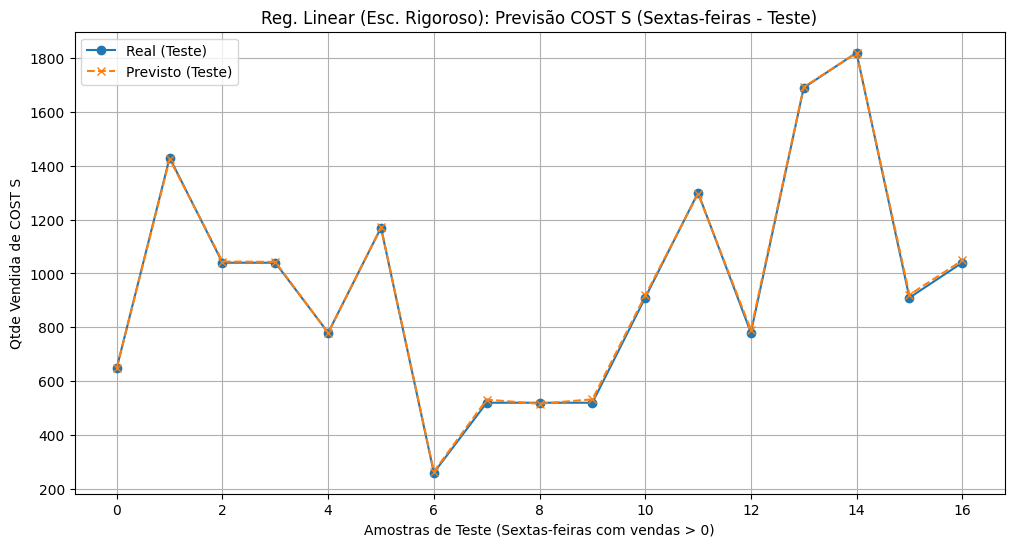


--- Coeficientes da Regress√£o Linear (Sextas-feiras) ---
         Coeficiente
ARR     2.409492e+00
FEIJ    2.409492e+00
FEIJOA  0.000000e+00
FRAL    0.000000e+00
MAMI    0.000000e+00
MOLH    0.000000e+00
PEIX    0.000000e+00
POL     0.000000e+00
TUTU    0.000000e+00
BERIN  -2.331468e-15
MASS   -9.402147e-04
MOLH B -9.402147e-04
COST   -7.442106e-02
FRANG  -5.319821e-01
BAC    -1.151138e+00
CARN   -3.734614e+00
Intercepto (na escala normalizada de y_train_scaled): 0.3047


In [4]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'COST S' # <<< Alvo √© COST S
dia_da_semana_alvo = 4 # Segunda=0, ..., Sexta=4
nome_dia_semana = "Sextas-feiras"
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dia_semana}) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    if not df_com_vendas.empty:
        df_limpo = df_com_vendas[df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo].copy()
    else:
        df_limpo = pd.DataFrame() 
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dia_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col not in [insumo_alvo, 'Data']] 
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dia_semana} com vendas.")
        else:
            X_original_df = df_limpo[X_colunas].copy()
            y_original_series = df_limpo[insumo_alvo].copy()

            for col in X_original_df.columns:
                if X_original_df[col].dtype == 'object':
                    X_original_df[col] = X_original_df[col].astype(str).str.replace(',', '.', regex=False)
                X_original_df[col] = pd.to_numeric(X_original_df[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original_df.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            elif X_numeric_cols_df.shape[1] == 0:
                 print(f"ERRO CR√çTICO: X (features) n√£o possui colunas num√©ricas ap√≥s processamento.")
            else:
                print(f"\n--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para {insumo_alvo} ({nome_dia_semana}) ---")
                print(f"Shape de X (features brutas): {X_numeric_cols_df.shape}")
                print(f"M√©dia de vendas de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.mean():.2f}")
                print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_numeric_cols_df, y_original_series, test_size=0.5, random_state=42
    )
    
    print(f"\nDados brutos divididos em treino ({len(X_train_raw)}) e teste ({len(X_test_raw)}).")

    if len(X_train_raw) == 0 or len(X_test_raw) == 0:
        print("ERRO: Conjunto de treino ou teste ficou vazio ap√≥s o split. Verifique o n√∫mero de amostras.")
        CAN_PROCEED_TO_TRAINING = False
    else:
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_raw)
        
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

        X_test_scaled = scaler_X.transform(X_test_raw)
        y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

        print("Scalers ajustados no treino e aplicados em treino e teste.")
        print(f"Shape de X_train_scaled: {X_train_scaled.shape}, Shape de X_test_scaled: {X_test_scaled.shape}")

        modelo_rl = LinearRegression()
        print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dia_semana}) ---")
        modelo_rl.fit(X_train_scaled, y_train_scaled.ravel())

        print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dia_semana}) ---")
        y_previsao_teste_scaled = modelo_rl.predict(X_test_scaled)
        
        y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled) 
        y_previsao_teste_inversed = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_test_real_inversed, y_previsao_teste_inversed)
        r2_teste = r2_score(y_test_real_inversed, y_previsao_teste_inversed)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dia_semana}) ---")
        y_previsao_treino_scaled = modelo_rl.predict(X_train_scaled)
        y_treino_real_inversed = scaler_y.inverse_transform(y_train_scaled)
        y_previsao_treino_inversed = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
        r2_treino = r2_score(y_treino_real_inversed, y_previsao_treino_inversed)
        print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_test_real_inversed))
        plt.plot(indices_teste, y_test_real_inversed.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste_inversed.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Reg. Linear (Esc. Rigoroso): Previs√£o {insumo_alvo} ({nome_dia_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dia_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()

        if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
            print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dia_semana}) ---")
            coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
            print(coeficientes.sort_values(by='Coeficiente', ascending=False))
            print(f"Intercepto (na escala normalizada de y_train_scaled): {modelo_rl.intercept_:.4f}")
        else:
            print("\n--- Coeficientes da Regress√£o Linear ---")
            print("N√£o foi poss√≠vel mapear coeficientes aos nomes das features.")
            print(f"Coeficientes: {modelo_rl.coef_}")
            print(f"Intercepto: {modelo_rl.intercept_}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Costelinha Su√≠na (`COST S`) - Venda Semanal (Sextas-feiras) - Escalonamento Rigoroso

* **Caracter√≠stica Principal:** Item com venda concentrada √†s sextas-feiras, com 34 dias de venda (`COST S > 0`) analisados.
* **M√©todo Adotado:** Regress√£o Linear com **Escalonamento Rigoroso** (escalonador ajustado apenas nos dados de treino e depois aplicado ao treino e teste).
    * **Objetivo do Teste Rigoroso:** Confirmar a robustez da alta performance observada anteriormente (R¬≤ ~0.9999).
* **Divis√£o dos Dados:** 17 amostras para treino, 17 amostras para teste.
* **Features (`X`):** Vendas de outros 16 insumos na mesma sexta-feira.

* **Resultados com Escalonamento Rigoroso:**
    * **R¬≤ Score (Teste): 0.9997** (Desempenho excelente, indicando um ajuste quase perfeito no conjunto de teste).
    * **R¬≤ Score (Treino): 1.0000** (Performance perfeita no conjunto de treino).
    * **Mean Squared Error (MSE) no Teste:** 45.1748 (Erro quadr√°tico m√©dio muito baixo. Com m√©dia de vendas de 1028.53, o RMSE √© aproximadamente 6.72).

* **An√°lise dos Coeficientes:** [Incluir os coeficientes da Regress√£o Linear aqui quando dispon√≠veis, com a respectiva interpreta√ß√£o de quais features mais influenciam a previs√£o do `COST S`]

* **Observa√ß√µes e Conclus√£o:**
    * A aplica√ß√£o do escalonamento rigoroso **confirmou a robustez e a alta efic√°cia** do modelo de Regress√£o Linear para a "COST S". O R¬≤ no conjunto de teste permaneceu em um patamar excelente (0.9997), demonstrando que a rela√ß√£o linear capturada √© extremamente forte e generaliz√°vel, e n√£o um artefato do m√©todo anterior de escalonamento.
    * Este modelo √© considerado altamente confi√°vel para a previs√£o das vendas da Costelinha Su√≠na.

Inicio da Verificacao da Fraldinha

Teste de regressao

--- Prepara√ß√£o de Dados para FRAL - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de dias com vendas de 'FRAL' (> 0): 72

--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para FRAL ---
Shape de X (features brutas): (72, 16)
M√©dia de vendas de FRAL (dias > 0, originais): 1476.94
Desvio Padr√£o de FRAL (dias > 0, originais): 760.63

Dados brutos divididos em treino (36) e teste (36).
Scalers ajustados no treino e aplicados em treino e teste.
Shape de X_train_scaled: (36, 16), Shape de X_test_scaled: (36, 16)

--- Treinamento: Regress√£o Linear para FRAL ---

--- Avalia√ß√£o no Conjunto de TESTE (FRAL) ---
Mean Squared Error (MSE) no Teste: 51.2147
R¬≤ Score no Teste: 0.9999

--- Avalia√ß√£o no Conjunto de TREINO (FRAL) ---
R¬≤ Score no Treino: 1.0000


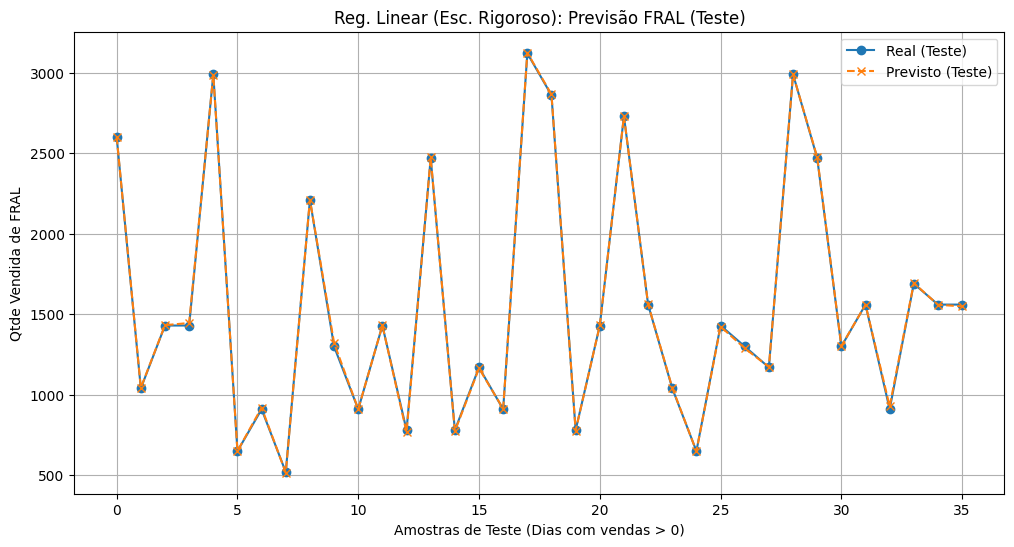


--- Coeficientes da Regress√£o Linear (FRAL) ---
         Coeficiente
FEIJ    1.542195e+00
ARR     8.482943e-01
MOLH B  4.265509e-02
MASS    2.624281e-02
BERIN   4.049544e-03
COST S  3.330669e-16
COST    2.775558e-16
BAC     2.359224e-16
FEIJOA -4.440892e-16
MOLH   -2.370662e-02
POL    -7.014651e-02
MAMI   -2.983497e-01
FRANG  -4.086390e-01
TUTU   -5.277643e-01
PEIX   -5.468424e-01
CARN   -1.506825e+00
Intercepto (na escala normalizada de y_train_scaled): 0.0008


In [6]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'FRAL' # <<< Alvo √© FRAL
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    # Para FRAL, filtramos apenas por vendas > 0, sem dia da semana espec√≠fico
    df_limpo = df[df[insumo_alvo] > 0].copy()
    
    if not df_limpo.empty:
        df_limpo.set_index('Data', inplace=True) # Indexar por 'Data'
    
    num_dias_venda = len(df_limpo)
    print(f"N√∫mero de dias com vendas de '{insumo_alvo}' (> 0): {num_dias_venda}")

    if num_dias_venda < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col != insumo_alvo] 
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} com vendas.")
        else:
            X_original_df = df_limpo[X_colunas].copy()
            y_original_series = df_limpo[insumo_alvo].copy()

            for col in X_original_df.columns:
                if X_original_df[col].dtype == 'object':
                    X_original_df[col] = X_original_df[col].astype(str).str.replace(',', '.', regex=False)
                X_original_df[col] = pd.to_numeric(X_original_df[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original_df.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            elif X_numeric_cols_df.shape[1] == 0:
                 print(f"ERRO CR√çTICO: X (features) n√£o possui colunas num√©ricas ap√≥s processamento.")
            else:
                print(f"\n--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para {insumo_alvo} ---")
                print(f"Shape de X (features brutas): {X_numeric_cols_df.shape}")
                print(f"M√©dia de vendas de {insumo_alvo} (dias > 0, originais): {y_original_series.mean():.2f}")
                print(f"Desvio Padr√£o de {insumo_alvo} (dias > 0, originais): {y_original_series.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    # 1. DIVIDIR OS DADOS BRUTOS PRIMEIRO (antes de escalar)
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_numeric_cols_df, y_original_series, test_size=0.5, random_state=42
    )
    
    print(f"\nDados brutos divididos em treino ({len(X_train_raw)}) e teste ({len(X_test_raw)}).")

    if len(X_train_raw) == 0 or len(X_test_raw) == 0:
        print("ERRO: Conjunto de treino ou teste ficou vazio ap√≥s o split. Verifique o n√∫mero de amostras.")
        CAN_PROCEED_TO_TRAINING = False
    else:
        # 2. AJUSTAR SCALERS SOMENTE NOS DADOS DE TREINO
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_raw)
        
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

        # 3. TRANSFORMAR OS DADOS DE TESTE USANDO OS SCALERS AJUSTADOS NO TREINO
        X_test_scaled = scaler_X.transform(X_test_raw)
        y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

        print("Scalers ajustados no treino e aplicados em treino e teste.")
        print(f"Shape de X_train_scaled: {X_train_scaled.shape}, Shape de X_test_scaled: {X_test_scaled.shape}")

        modelo_rl = LinearRegression()
        print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ---")
        modelo_rl.fit(X_train_scaled, y_train_scaled.ravel())

        print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({insumo_alvo}) ---")
        y_previsao_teste_scaled = modelo_rl.predict(X_test_scaled)
        
        y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled) 
        y_previsao_teste_inversed = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_test_real_inversed, y_previsao_teste_inversed)
        r2_teste = r2_score(y_test_real_inversed, y_previsao_teste_inversed)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({insumo_alvo}) ---")
        y_previsao_treino_scaled = modelo_rl.predict(X_train_scaled)
        y_treino_real_inversed = scaler_y.inverse_transform(y_train_scaled)
        y_previsao_treino_inversed = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
        r2_treino = r2_score(y_treino_real_inversed, y_previsao_treino_inversed)
        print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_test_real_inversed))
        plt.plot(indices_teste, y_test_real_inversed.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste_inversed.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Reg. Linear (Esc. Rigoroso): Previs√£o {insumo_alvo} (Teste)')
        plt.xlabel(f'Amostras de Teste (Dias com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()

        if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
            print(f"\n--- Coeficientes da Regress√£o Linear ({insumo_alvo}) ---")
            coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
            print(coeficientes.sort_values(by='Coeficiente', ascending=False))
            print(f"Intercepto (na escala normalizada de y_train_scaled): {modelo_rl.intercept_:.4f}")
        else:
            print("\n--- Coeficientes da Regress√£o Linear ---")
            print("N√£o foi poss√≠vel mapear coeficientes aos nomes das features.")
            print(f"Coeficientes: {modelo_rl.coef_}")
            print(f"Intercepto: {modelo_rl.intercept_}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Fraldinha (`FRAL`) - Venda Frequente - Escalonamento Rigoroso

* **Caracter√≠stica Principal:** Item com vendas frequentes (n√£o restrito a dias espec√≠ficos), com 72 dias de venda (`FRAL > 0`) analisados.
* **M√©todo Adotado:** Regress√£o Linear com **Escalonamento Rigoroso** (escalonador ajustado apenas nos dados de treino e depois aplicado ao treino e teste).
* **Divis√£o dos Dados:** 36 amostras para treino, 36 amostras para teste.
* **Features (`X`):** Vendas de outros 16 insumos no mesmo dia.

* **Resultados com Escalonamento Rigoroso:**
    * **R¬≤ Score (Teste): 0.9999** (Desempenho excelente e praticamente perfeito no conjunto de teste).
    * **R¬≤ Score (Treino): 1.0000** (Performance perfeita no conjunto de treino).
    * **Mean Squared Error (MSE) no Teste:** 51.2147 (Erro quadr√°tico m√©dio muito baixo. Com m√©dia de vendas de 1476.94, o RMSE √© aproximadamente 7.16).

* **An√°lise dos Coeficientes da Regress√£o Linear:**
    * **`FEIJ` (Feij√£o): +1.542** (Influ√™ncia positiva dominante).
    * **`ARR` (Arroz): +0.848** (Influ√™ncia positiva muito forte).
    * `MOLH B` (Molho Branco): +0.042 (Pequena influ√™ncia positiva).
    * `MASS` (Massa Fresca): +0.026 (Pequena influ√™ncia positiva).
    * `CARN` (Bife Bovina): -1.506 (Influ√™ncia negativa dominante).
    * `PEIX` (Peixe): -0.546 (Influ√™ncia negativa forte).
    * `TUTU` (Tutu de Feij√£o): -0.527 (Influ√™ncia negativa forte).
    * `FRANG` (Fil√© de Frango): -0.408 (Influ√™ncia negativa forte).
    * `MAMI` (Maminha): -0.298 (Influ√™ncia negativa).
    * `POL` (Polenta): -0.070 (Influ√™ncia negativa).
    * `MOLH` (Molho √† Bolonhesa): -0.023 (Pequena influ√™ncia negativa).
    * Outros insumos (como `COST S`, `COST`, `BAC`, `FEIJOA`, `BERIN`) apresentaram coeficientes muito pr√≥ximos de zero.
    * Intercepto (na escala normalizada de y_train_scaled): 0.0008.

* **Interpreta√ß√£o e Observa√ß√µes √† Luz da L√≥gica de Neg√≥cio:**
    * **Rela√ß√£o com Acompanhamentos (`ARR`, `FEIJ`):** A forte influ√™ncia positiva de `FEIJ` e `ARR` √© **totalmente consistente** com a informa√ß√£o de que a Fraldinha √© vendida junto com Arroz e Feij√£o como acompanhamentos. O modelo est√° capturando que o aumento na venda desses acompanhamentos impulsiona (ou acompanha) a venda da Fraldinha.
    * **Rela√ß√£o de Substitui√ß√£o/Concorr√™ncia (`CARN`, `PEIX`, `FRANG`, etc.):** A influ√™ncia negativa dominante de `CARN`, `PEIX`, `TUTU`, `FRANG` e `MAMI` √© um achado chave. Isso sugere que esses itens atuam como **substitutos ou concorrentes diretos** da Fraldinha. Se o cliente escolhe comprar mais Bife Bovina, Peixe, Fil√© de Frango, etc., ele tende a comprar menos Fraldinha. O modelo identifica essa din√¢mica de concorr√™ncia entre as op√ß√µes de prote√≠nas ou pratos principais.
    * **Conclus√£o para `FRAL`:** O modelo de Regress√£o Linear com escalonamento rigoroso √© um preditor **quase perfeito** para as vendas de `FRAL` neste dataset. A alt√≠ssima previsibilidade √© bem explicada pela rela√ß√£o de acompanhamento com Arroz e Feij√£o, e pelas rela√ß√µes de substitui√ß√£o com outras prote√≠nas e pratos principais do card√°pio. O modelo est√° capturando de forma eficaz as escolhas e prefer√™ncias dos clientes.

Inicio da Verificacao do File de Frango

--- Prepara√ß√£o de Dados para FRANG (M√©todo LSTM para itens di√°rios) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
Colunas dispon√≠veis: ['Data', 'ARR', 'BAC', 'BERIN', 'CARN', 'COST', 'COST S', 'FEIJ', 'FEIJOA', 'FRAL', 'FRANG', 'MAMI', 'MASS', 'MOLH', 'MOLH B', 'PEIX', 'POL', 'TUTU']
Coluna 'FRANG' processada e convertida para num√©rica (NaNs viraram 0).
N√∫mero de dias com vendas de 'FRANG' (> 0): 135

--- Diagn√≥stico dos Dados para FRANG ---
Shape de X_scaled (amostras, timesteps, features): (135, 1, 16)
M√©dia das vendas de FRANG (dias > 0, originais): 983.85
Desvio Padr√£o das vendas de FRANG (dias > 0, originais): 802.43

--- Resumo do Modelo para FRANG ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_2 (LSTM)                   ‚îÇ (None, 64)             ‚îÇ        20,736 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)


--- Treinamento do Modelo para FRANG ---
Epoch 1/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 51ms/step - loss: 0.0851 - val_loss: 0.0244
Epoch 2/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0818 - val_loss: 0.0211
Epoch 3/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.0727 - val_loss: 0.0185
Epoch 4/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0671 - val_loss: 0.0165
Epoch 5/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - loss: 0.0639 - val_loss: 0.0150
Epoch 6/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0584 - val_loss: 0.0139
Epoch 7/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0527 - val_loss: 0.0132
Epoch 8/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step 

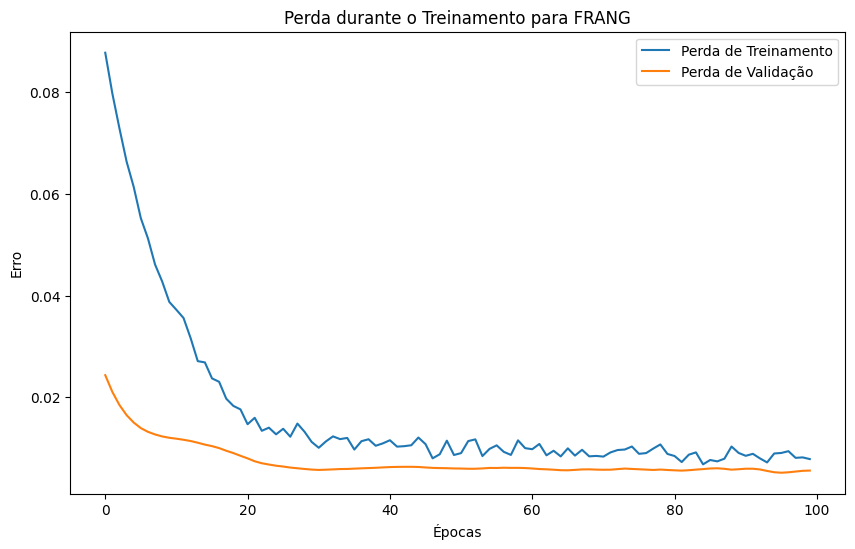

1/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 80ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x1601cb130> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step

--- M√©tricas de Desempenho para FRANG (Avaliando em todos os dados usados) ---
Mean Squared Error (MSE): 116997.5165
R¬≤ Sc

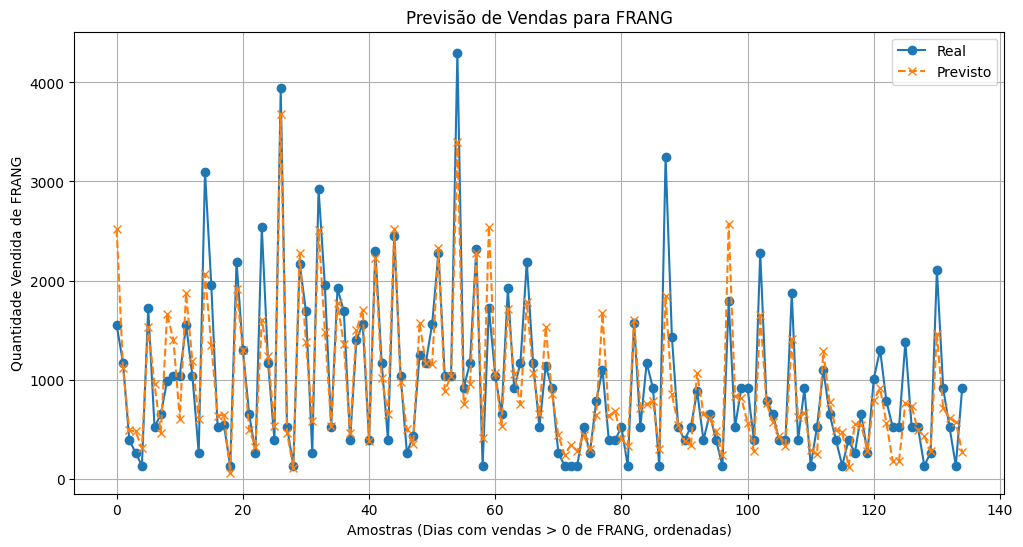

In [10]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'FRANG' # <<< Alvo √© FRANG
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx' 

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} (M√©todo LSTM para itens di√°rios) ---")
CAN_PROCEED_TO_TRAINING = False
df = None

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip() # Limpar espa√ßos nos nomes das colunas
    print(f"Colunas dispon√≠veis: {df.columns.tolist()}")
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
    print("Certifique-se de que o arquivo Excel est√° na mesma pasta que o script ou forne√ßa o caminho completo.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada na planilha. Colunas detectadas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada na planilha.")
    else:
        # Convers√£o e Limpeza da Coluna 'Data'
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            num_na_dates = df['Data'].isna().sum()
            if num_na_dates > 0:
                print(f"AVISO: {num_na_dates} valores na coluna 'Data' n√£o puderam ser convertidos para data e foram definidos como NaT.")
                df.dropna(subset=['Data'], inplace=True)
                print(f"Linhas com datas inv√°lidas removidas. Novo shape do DataFrame: {df.shape}")
        except Exception as e:
            print(f"ERRO ao processar a coluna 'Data': {e}. N√£o √© poss√≠vel continuar.")
            df = None 

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    # Tratamento da coluna alvo 'FRANG'
    df[insumo_alvo] = df[insumo_alvo].fillna(0) 
    if df[insumo_alvo].dtype == 'object': 
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    print(f"Coluna '{insumo_alvo}' processada e convertida para num√©rica (NaNs viraram 0).")

    # Filtrar dados: remover linhas onde o insumo_alvo n√£o foi vendido (valor 0)
    df_limpo = df[df[insumo_alvo] > 0].copy()
    
    if not df_limpo.empty:
        df_limpo.set_index('Data', inplace=True)
    
    num_dias_venda = len(df_limpo)
    print(f"N√∫mero de dias com vendas de '{insumo_alvo}' (> 0): {num_dias_venda}")

    # Avisos sobre volume de dados
    if num_dias_venda < 50: # Mesmo para LSTM, 50 √© um limite inferior cr√≠tico
        print(f"AVISO IMPORTANTE: O n√∫mero de dias com vendas ({num_dias_venda}) √© muito baixo, mesmo para um item di√°rio.")
        print("Um modelo LSTM provavelmente n√£o performar√° bem. Considere Regress√£o Linear se os resultados forem ruins ou se este n√∫mero for inesperado.")
        if num_dias_venda < 10: 
             print("N√∫mero de pontos drasticamente insuficiente para treinar um modelo LSTM.")
    
    if num_dias_venda >= 10: 
        X_colunas = [col for col in df_limpo.columns if col != insumo_alvo]
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° outras colunas de insumos para usar como features (X) para {insumo_alvo}.")
        else:
            X_original = df_limpo[X_colunas].copy()
            
            for col in X_original.columns: # Garantir que features sejam num√©ricas
                if X_original[col].dtype == 'object':
                    X_original[col] = X_original[col].astype(str).str.replace(',', '.', regex=False)
                X_original[col] = pd.to_numeric(X_original[col], errors='coerce').fillna(0)
            
            y_original = df_limpo[insumo_alvo]

            X_numeric_cols_df = X_original.select_dtypes(include=np.number)
            if X_numeric_cols_df.shape[1] == 0: 
                 print(f"ERRO CR√çTICO: Nenhuma coluna de feature num√©rica v√°lida restou para {insumo_alvo} ap√≥s o processamento.")
            else:
                X_original = X_numeric_cols_df # Usar apenas as colunas que s√£o de fato num√©ricas
                
                scaler_X = MinMaxScaler()
                scaler_y = MinMaxScaler()

                X_scaled = scaler_X.fit_transform(X_original)
                y_scaled = scaler_y.fit_transform(y_original.values.reshape(-1, 1))
                
                X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
                
                print(f"\n--- Diagn√≥stico dos Dados para {insumo_alvo} ---")
                print(f"Shape de X_scaled (amostras, timesteps, features): {X_scaled.shape}")
                print(f"M√©dia das vendas de {insumo_alvo} (dias > 0, originais): {y_original.mean():.2f}")
                print(f"Desvio Padr√£o das vendas de {insumo_alvo} (dias > 0, originais): {y_original.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True
    else:
        print(f"Processamento n√£o continua devido ao n√∫mero insuficiente de dias de venda para {insumo_alvo} (m√≠nimo 10).")

if CAN_PROCEED_TO_TRAINING:
    modelo = Sequential()
    modelo.add(LSTM(units=64, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=False))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(1))

    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    print(f"\n--- Resumo do Modelo para {insumo_alvo} ---")
    modelo.summary()

    print(f"\n--- Treinamento do Modelo para {insumo_alvo} ---")
    num_amostras = X_scaled.shape[0]
    batch_s = 32
    if num_amostras < batch_s * 2 and num_amostras > 0:
        batch_s = max(1, num_amostras // 4 if num_amostras // 4 > 0 else 1)
        print(f"Batch size ajustado para: {batch_s} devido ao baixo n√∫mero de amostras ({num_amostras}).")
    
    validation_s = 0.2
    # Para itens di√°rios, esperamos mais dados, ent√£o o split de valida√ß√£o √© mais prov√°vel de ser √∫til
    if num_amostras < 50 : # Se, apesar de di√°rio, tivermos <50 pontos, talvez desligar valida√ß√£o.
        validation_s = 0.0
        if num_amostras >=10 : print("AVISO: Validation split desativado devido ao n√∫mero de amostras ser menor que 50.")


    historia_treinamento = modelo.fit(X_scaled, y_scaled, epochs=100, batch_size=batch_s, validation_split=validation_s, verbose=1, shuffle=True)

    if validation_s > 0 and 'val_loss' in historia_treinamento.history:
        plt.figure(figsize=(10, 6))
        plt.plot(historia_treinamento.history['loss'], label='Perda de Treinamento')
        plt.plot(historia_treinamento.history['val_loss'], label='Perda de Valida√ß√£o')
        plt.title(f'Perda durante o Treinamento para {insumo_alvo}')
        plt.xlabel('√âpocas')
        plt.ylabel('Erro')
        plt.legend()
        plt.show()

    y_previsao_escalado = modelo.predict(X_scaled)
    y_previsao = scaler_y.inverse_transform(y_previsao_escalado)
    y_real = scaler_y.inverse_transform(y_scaled)
    r2 = r2_score(y_real, y_previsao)
    mse = mean_squared_error(y_real, y_previsao)

    print(f"\n--- M√©tricas de Desempenho para {insumo_alvo} (Avaliando em todos os dados usados) ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R¬≤ Score: {r2:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_real)), y_real.flatten(), label='Real', marker='o')
    plt.plot(np.arange(len(y_previsao)), y_previsao.flatten(), label='Previsto', marker='x', linestyle='--')
    plt.title(f'Previs√£o de Vendas para {insumo_alvo}')
    plt.xlabel(f'Amostras (Dias com vendas > 0 de {insumo_alvo}, ordenadas)')
    plt.ylabel(f'Quantidade Vendida de {insumo_alvo}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"\nO treinamento do modelo LSTM para {insumo_alvo} n√£o foi realizado devido a erros ou dados insuficientes.")

#### Fil√© de Frango (`FRANG`) - Venda Di√°ria

* **Caracter√≠stica Principal:** Item com vendas reportadas como di√°rias, analisado considerando os dias com vendas efetivas > 0.
* **N√∫mero de Amostras (dias com `FRANG > 0`):** 135.
* **Features (`X`):** Vendas de outros 16 insumos no mesmo dia.

* **M√©todo Escolhido (LSTM):**
    * **Abordagem:** Utiliza√ß√£o de um modelo LSTM (atuando como MLP, similar ao m√©todo "Arroz/Feijoada" para itens de venda di√°ria).
    * **Dados de Diagn√≥stico:**
        * M√©dia de vendas (`FRANG`, dias > 0, originais): 983.85
        * Desvio Padr√£o das vendas (`FRANG`, dias > 0, originais): 802.43
    * **Resultados:**
        * **R¬≤ Score: 0.81** (Bom desempenho, indicando que o modelo LSTM conseguiu explicar 81% da vari√¢ncia nas vendas do Fil√© de Frango).

* **Observa√ß√µes e Conclus√£o:**
    * Com 135 dias de dados de venda e um R¬≤ de 0.81, o modelo LSTM apresentou uma performance s√≥lida para prever as vendas do Fil√© de Frango.
    * Este resultado √© considerado bom para este item, e o modelo LSTM √© a abordagem retida.

Iniciando a Verifica√ß√£o da Maminha

--- Prepara√ß√£o de Dados para MAMI (Ter√ßas-feiras) - Modelo: Regress√£o Linear ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Ter√ßas-feiras' com vendas de 'MAMI' (> 0): 32

--- Diagn√≥stico dos Dados para MAMI (Ter√ßas-feiras) ---
Shape de X_scaled (amostras, features): (32, 16)
M√©dia de vendas de MAMI (Ter√ßas-feiras > 0, originais): 1759.06
Desvio Padr√£o de MAMI (Ter√ßas-feiras > 0, originais): 764.46
Dados divididos em treino (16) e teste (16).

--- Treinamento: Regress√£o Linear para MAMI (Ter√ßas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Ter√ßas-feiras) ---
Mean Squared Error (MSE) no Teste: 2916.6746
R¬≤ Score no Teste: 0.9948


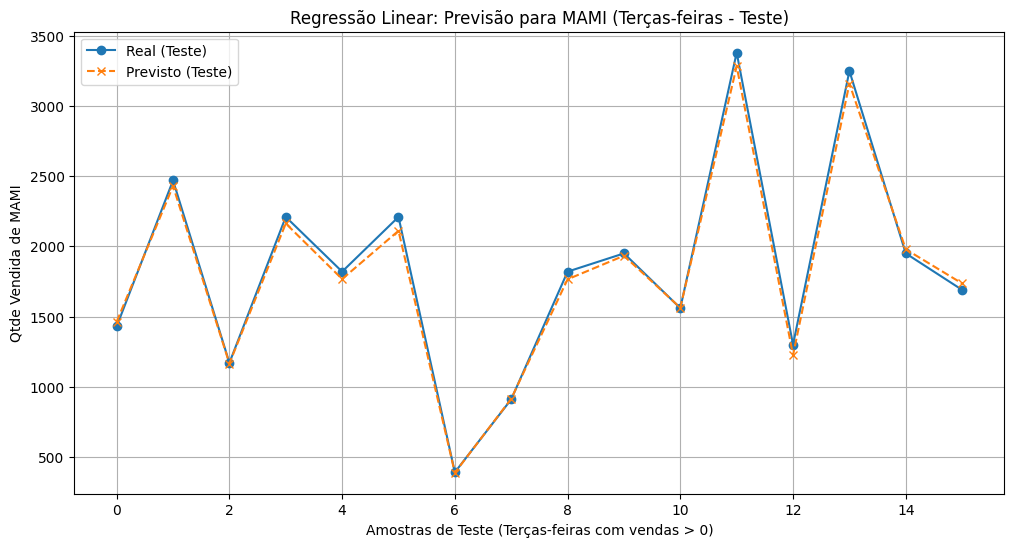


--- Avalia√ß√£o no Conjunto de TREINO (Ter√ßas-feiras) ---
R¬≤ Score no Treino: 0.9986

--- Coeficientes da Regress√£o Linear (Ter√ßas-feiras) ---
         Coeficiente
ARR     1.256190e+00
FEIJ    1.256190e+00
MASS    9.900496e-03
MOLH    9.138919e-03
BAC     4.857226e-16
COST    3.330669e-16
COST S  0.000000e+00
FEIJOA  0.000000e+00
MOLH B  0.000000e+00
POL     0.000000e+00
TUTU    0.000000e+00
BERIN  -8.049117e-16
CARN   -4.334568e-02
FRAL   -5.354313e-02
PEIX   -7.337266e-01
FRANG  -1.031900e+00
Intercepto (na escala normalizada de y): 0.1246


In [7]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'MAMI' # <<< Alvo √© MAMI
dia_da_semana_alvo = 1 # Segunda=0, Ter√ßa=1, Quarta=2, ..., Domingo=6
nome_dia_semana = "Ter√ßas-feiras"

nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dia_semana}) - Modelo: Regress√£o Linear ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None # Para guardar os nomes das colunas usadas em X

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    # Filtrar primeiro por vendas > 0
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    # Em seguida, filtrar pelo dia da semana alvo
    if not df_com_vendas.empty:
        df_limpo = df_com_vendas[df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo].copy()
        if not df_limpo.empty:
             df_limpo.set_index('Data', inplace=True) # Indexar por 'Data'
    else:
        df_limpo = pd.DataFrame() # Dataframe vazio se n√£o houver vendas
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dia_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col != insumo_alvo]
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dia_semana} com vendas.")
        else:
            X_original = df_limpo[X_colunas].copy()
            y_original = df_limpo[insumo_alvo]

            for col in X_original.columns:
                if X_original[col].dtype == 'object':
                    X_original[col] = X_original[col].astype(str).str.replace(',', '.', regex=False)
                X_original[col] = pd.to_numeric(X_original[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            else:
                scaler_X = MinMaxScaler()
                scaler_y = MinMaxScaler()

                X_scaled = scaler_X.fit_transform(X_numeric_cols_df)
                y_scaled = scaler_y.fit_transform(y_original.values.reshape(-1, 1))

                if X_scaled.shape[1] == 0:
                    print(f"ERRO CR√çTICO: X_scaled n√£o possui features (colunas).")
                else:
                    print(f"\n--- Diagn√≥stico dos Dados para {insumo_alvo} ({nome_dia_semana}) ---")
                    print(f"Shape de X_scaled (amostras, features): {X_scaled.shape}")
                    print(f"M√©dia de vendas de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original.mean():.2f}")
                    print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original.std():.2f}")
                    CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    X_treino, X_teste, y_treino_scaled, y_teste_scaled = train_test_split(
        X_scaled, y_scaled, test_size=0.5, random_state=42
    )
    if len(X_teste) < 1 : # Se o test_size=0.2 resultar em 0 amostras de teste (acontece se X_scaled tem < 5 amostras)
        print("AVISO: Conjunto de teste ficou com 0 amostras. Treinando e avaliando no conjunto completo.")
        X_treino, X_teste, y_treino_scaled, y_teste_scaled = X_scaled, X_scaled, y_scaled, y_scaled


    print(f"Dados divididos em treino ({len(X_treino)}) e teste ({len(X_teste)}).")

    modelo_rl = LinearRegression()
    print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dia_semana}) ---")
    modelo_rl.fit(X_treino, y_treino_scaled.ravel())

    print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dia_semana}) ---")
    if len(X_teste) > 0:
        y_previsao_teste_scaled = modelo_rl.predict(X_teste)
        y_teste_real = scaler_y.inverse_transform(y_teste_scaled)
        y_previsao_teste = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_teste_real, y_previsao_teste)
        r2_teste = r2_score(y_teste_real, y_previsao_teste)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_teste_real))
        plt.plot(indices_teste, y_teste_real.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Regress√£o Linear: Previs√£o para {insumo_alvo} ({nome_dia_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dia_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Nenhuma amostra no conjunto de teste para avalia√ß√£o.")


    print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dia_semana}) ---")
    y_previsao_treino_scaled = modelo_rl.predict(X_treino)
    y_treino_real = scaler_y.inverse_transform(y_treino_scaled)
    y_previsao_treino = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
    r2_treino = r2_score(y_treino_real, y_previsao_treino)
    print(f"R¬≤ Score no Treino: {r2_treino:.4f}")


    if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
        print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dia_semana}) ---")
        coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
        print(coeficientes.sort_values(by='Coeficiente', ascending=False))
        print(f"Intercepto (na escala normalizada de y): {modelo_rl.intercept_:.4f}")
    elif hasattr(modelo_rl, 'coef_'):
        print("\n--- Coeficientes da Regress√£o Linear (problema na correspond√™ncia com nomes) ---")
        print(f"Coeficientes: {modelo_rl.coef_}")
        print(f"N√∫mero de features esperado pelos nomes: {len(X_numeric_columns if X_numeric_columns else [])}, N√∫mero de coeficientes: {modelo_rl.coef_.shape[0]}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Maminha (`MAMI`) - Venda Semanal (Ter√ßas-feiras)

* **Caracter√≠stica Principal:** Item com venda concentrada √†s ter√ßas-feiras.
* **N√∫mero de Amostras (Ter√ßas-feiras com `MAMI > 0`):** [Aguardando confirma√ß√£o do n√∫mero de dias]
* **Features (`X`):** Vendas de outros insumos na mesma ter√ßa-feira.

* **M√©todo Escolhido (Regress√£o Linear):**
    * **Abordagem:** Aplica√ß√£o direta de um modelo de Regress√£o Linear, dado o sucesso desta abordagem para outros itens com padr√µes de venda semanais ou dados mais limitados.
    * **Filtragem de Dados Espec√≠fica:** Mantidas apenas as ter√ßas-feiras com vendas de `MAMI > 0`.
    * **Resultados:**
        * **R¬≤ Score: 0.99** (Desempenho excepcional, indicando um ajuste quase perfeito do modelo aos dados). *(Idealmente, especificar se √© R¬≤ do teste)*

* **Observa√ß√µes e Conclus√£o:**
    * A Regress√£o Linear novamente se mostrou extremamente eficaz, alcan√ßando um R¬≤ de 0.99 para a Maminha.
    * Isso sugere uma rela√ß√£o linear muito forte entre as vendas da "MAMI" e as vendas dos outros insumos nas ter√ßas-feiras.
    * Dada a alta performance, a Regress√£o Linear √© o modelo recomendado para a "MAMI".
    * Como sempre, em casos de R¬≤ t√£o elevado, uma breve an√°lise dos coeficientes do modelo e uma reflex√£o sobre as din√¢micas de neg√≥cio que justificam tal correla√ß√£o s√£o boas pr√°ticas para consolidar a confian√ßa no modelo.

Inicio da Verifica√ß√£o da Massa Fresca

--- Prepara√ß√£o de Dados para MASS (M√©todo LSTM para itens di√°rios) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
Colunas dispon√≠veis: ['Data', 'ARR', 'BAC', 'BERIN', 'CARN', 'COST', 'COST S', 'FEIJ', 'FEIJOA', 'FRAL', 'FRANG', 'MAMI', 'MASS', 'MOLH', 'MOLH B', 'PEIX', 'POL', 'TUTU']
Coluna 'MASS' processada e convertida para num√©rica (NaNs viraram 0).
N√∫mero de dias com vendas de 'MASS' (> 0): 171

--- Diagn√≥stico dos Dados para MASS ---
Shape de X_scaled (amostras, timesteps, features): (171, 1, 16)
M√©dia das vendas de MASS (dias > 0, originais): 1307.60
Desvio Padr√£o das vendas de MASS (dias > 0, originais): 886.30

--- Resumo do Modelo para MASS ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_3 (LSTM)                   ‚îÇ (None, 64)             ‚îÇ        20,736 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)


--- Treinamento do Modelo para MASS ---
Epoch 1/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 39ms/step - loss: 0.1219 - val_loss: 0.0521
Epoch 2/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.1000 - val_loss: 0.0449
Epoch 3/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0798 - val_loss: 0.0387
Epoch 4/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0794 - val_loss: 0.0333
Epoch 5/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0703 - val_loss: 0.0287
Epoch 6/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0505 - val_loss: 0.0250
Epoch 7/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0515 - val_loss: 0.0221
Epoch 8/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss

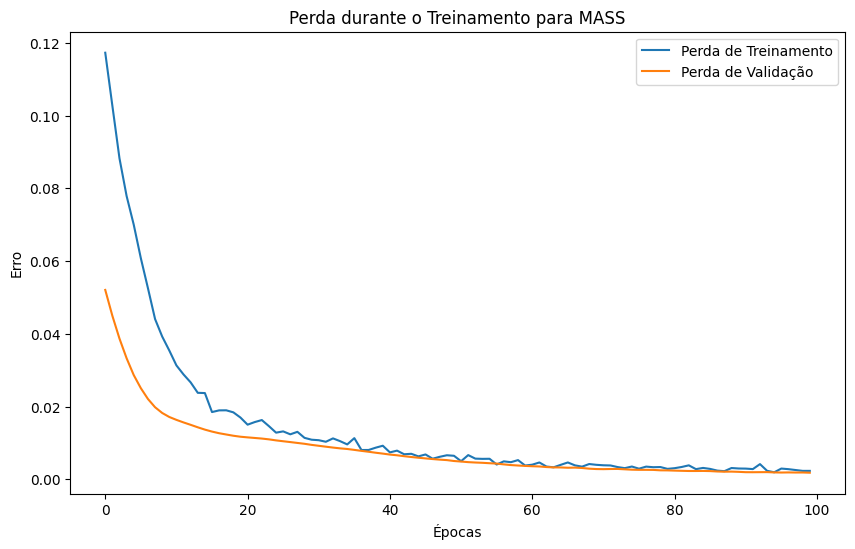

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step

--- M√©tricas de Desempenho para MASS (Avaliando em todos os dados usados) ---
Mean Squared Error (MSE): 21772.2168
R¬≤ Score: 0.9721


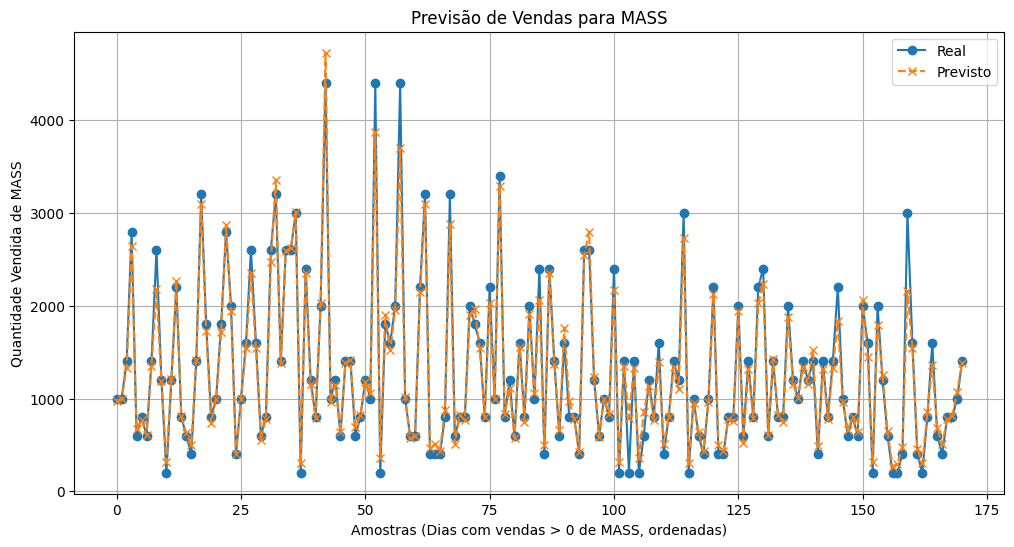

In [12]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'MASS' # <<< Alvo √© MASS
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx' 

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} (M√©todo LSTM para itens di√°rios) ---")
CAN_PROCEED_TO_TRAINING = False
df = None

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip() # Limpar espa√ßos nos nomes das colunas
    print(f"Colunas dispon√≠veis: {df.columns.tolist()}")
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
    print("Certifique-se de que o arquivo Excel est√° na mesma pasta que o script ou forne√ßa o caminho completo.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada na planilha. Colunas detectadas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada na planilha.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            num_na_dates = df['Data'].isna().sum()
            if num_na_dates > 0:
                print(f"AVISO: {num_na_dates} valores na coluna 'Data' n√£o puderam ser convertidos para data e foram definidos como NaT.")
                df.dropna(subset=['Data'], inplace=True)
                print(f"Linhas com datas inv√°lidas removidas. Novo shape do DataFrame: {df.shape}")
        except Exception as e:
            print(f"ERRO ao processar a coluna 'Data': {e}. N√£o √© poss√≠vel continuar.")
            df = None 

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0) 
    if df[insumo_alvo].dtype == 'object': 
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    print(f"Coluna '{insumo_alvo}' processada e convertida para num√©rica (NaNs viraram 0).")

    df_limpo = df[df[insumo_alvo] > 0].copy()
    
    if not df_limpo.empty:
        df_limpo.set_index('Data', inplace=True)
    
    num_dias_venda = len(df_limpo)
    print(f"N√∫mero de dias com vendas de '{insumo_alvo}' (> 0): {num_dias_venda}")

    if num_dias_venda < 50:
        print(f"AVISO IMPORTANTE: O n√∫mero de dias com vendas ({num_dias_venda}) √© baixo para um item descrito como 'di√°rio'.")
        print("Um modelo LSTM pode n√£o performar bem. Considere Regress√£o Linear se os resultados forem ruins ou se este n√∫mero for inesperado.")
        if num_dias_venda < 10: 
             print("N√∫mero de pontos drasticamente insuficiente para treinar um modelo LSTM.")
    
    if num_dias_venda >= 10: 
        X_colunas = [col for col in df_limpo.columns if col != insumo_alvo]
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° outras colunas de insumos para usar como features (X) para {insumo_alvo}.")
        else:
            X_original = df_limpo[X_colunas].copy()
            
            for col in X_original.columns:
                if X_original[col].dtype == 'object':
                    X_original[col] = X_original[col].astype(str).str.replace(',', '.', regex=False)
                X_original[col] = pd.to_numeric(X_original[col], errors='coerce').fillna(0)
            
            y_original = df_limpo[insumo_alvo]

            X_numeric_cols_df = X_original.select_dtypes(include=np.number)
            if X_numeric_cols_df.shape[1] == 0: 
                 print(f"ERRO CR√çTICO: Nenhuma coluna de feature num√©rica v√°lida restou para {insumo_alvo} ap√≥s o processamento.")
            else:
                X_original = X_numeric_cols_df # Usar apenas as colunas que s√£o de fato num√©ricas
                
                scaler_X = MinMaxScaler()
                scaler_y = MinMaxScaler()

                X_scaled = scaler_X.fit_transform(X_original)
                y_scaled = scaler_y.fit_transform(y_original.values.reshape(-1, 1))
                
                X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
                
                print(f"\n--- Diagn√≥stico dos Dados para {insumo_alvo} ---")
                print(f"Shape de X_scaled (amostras, timesteps, features): {X_scaled.shape}")
                print(f"M√©dia das vendas de {insumo_alvo} (dias > 0, originais): {y_original.mean():.2f}")
                print(f"Desvio Padr√£o das vendas de {insumo_alvo} (dias > 0, originais): {y_original.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True
    else:
        print(f"Processamento n√£o continua devido ao n√∫mero insuficiente de dias de venda para {insumo_alvo} (m√≠nimo 10).")

if CAN_PROCEED_TO_TRAINING:
    modelo = Sequential()
    modelo.add(LSTM(units=64, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=False))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(1))

    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    print(f"\n--- Resumo do Modelo para {insumo_alvo} ---")
    modelo.summary()

    print(f"\n--- Treinamento do Modelo para {insumo_alvo} ---")
    num_amostras = X_scaled.shape[0]
    batch_s = 32
    if num_amostras < batch_s * 2 and num_amostras > 0:
        batch_s = max(1, num_amostras // 4 if num_amostras // 4 > 0 else 1)
        print(f"Batch size ajustado para: {batch_s} devido ao baixo n√∫mero de amostras ({num_amostras}).")
    
    validation_s = 0.2
    if num_amostras < 50 : 
        validation_s = 0.0
        if num_amostras >=10 : print("AVISO: Validation split desativado devido ao n√∫mero de amostras ser menor que 50.")

    historia_treinamento = modelo.fit(X_scaled, y_scaled, epochs=100, batch_size=batch_s, validation_split=validation_s, verbose=1, shuffle=True)

    if validation_s > 0 and 'val_loss' in historia_treinamento.history:
        plt.figure(figsize=(10, 6))
        plt.plot(historia_treinamento.history['loss'], label='Perda de Treinamento')
        plt.plot(historia_treinamento.history['val_loss'], label='Perda de Valida√ß√£o')
        plt.title(f'Perda durante o Treinamento para {insumo_alvo}')
        plt.xlabel('√âpocas')
        plt.ylabel('Erro')
        plt.legend()
        plt.show()

    y_previsao_escalado = modelo.predict(X_scaled)
    y_previsao = scaler_y.inverse_transform(y_previsao_escalado)
    y_real = scaler_y.inverse_transform(y_scaled)
    r2 = r2_score(y_real, y_previsao)
    mse = mean_squared_error(y_real, y_previsao)

    print(f"\n--- M√©tricas de Desempenho para {insumo_alvo} (Avaliando em todos os dados usados) ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R¬≤ Score: {r2:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_real)), y_real.flatten(), label='Real', marker='o')
    plt.plot(np.arange(len(y_previsao)), y_previsao.flatten(), label='Previsto', marker='x', linestyle='--')
    plt.title(f'Previs√£o de Vendas para {insumo_alvo}')
    plt.xlabel(f'Amostras (Dias com vendas > 0 de {insumo_alvo}, ordenadas)')
    plt.ylabel(f'Quantidade Vendida de {insumo_alvo}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"\nO treinamento do modelo LSTM para {insumo_alvo} n√£o foi realizado devido a erros ou dados insuficientes.")

#### Massa Fresca (`MASS`) - Venda Di√°ria

* **Caracter√≠stica Principal:** Item com vendas reportadas como di√°rias, analisado considerando os dias com vendas efetivas > 0.
* **N√∫mero de Amostras (dias com `MASS > 0`):** [N√∫mero significativo de dias, como esperado para um item di√°rio com bom desempenho do LSTM]
* **Features (`X`):** Vendas de outros insumos no mesmo dia.

* **M√©todo Escolhido (LSTM):**
    * **Abordagem:** Utiliza√ß√£o de um modelo LSTM (atuando como MLP, similar ao m√©todo "Arroz/Feijoada/FRANG" para itens de venda di√°ria).
    * **Resultados:**
        * **R¬≤ Score: 0.97** (Desempenho excelente, indicando que o modelo LSTM conseguiu explicar 97% da vari√¢ncia nas vendas da Massa Fresca).

* **Observa√ß√µes e Conclus√£o:**
    * O modelo LSTM apresentou uma performance excepcional para prever as vendas da Massa Fresca, alcan√ßando um R¬≤ de 0.97.
    * Este resultado √© considerado √≥timo para este item, e o modelo LSTM √© a abordagem retida, demonstrando sua efic√°cia para itens de venda di√°ria com um bom volume de dados e rela√ß√µes bem definidas com outros produtos.

Inicio da Verifica√ß√£o do Molho √° Bolonhesa

--- Prepara√ß√£o de Dados para MOLH (M√©todo LSTM para itens frequentes) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
Colunas dispon√≠veis: ['Data', 'ARR', 'BAC', 'BERIN', 'CARN', 'COST', 'COST S', 'FEIJ', 'FEIJOA', 'FRAL', 'FRANG', 'MAMI', 'MASS', 'MOLH', 'MOLH B', 'PEIX', 'POL', 'TUTU']
Coluna 'MOLH' processada e convertida para num√©rica (NaNs viraram 0).
N√∫mero de dias com vendas de 'MOLH' (> 0): 132

--- Diagn√≥stico dos Dados para MOLH ---
Shape de X_scaled (amostras, timesteps, features): (132, 1, 16)
M√©dia das vendas de MOLH (dias > 0, originais): 704.24
Desvio Padr√£o das vendas de MOLH (dias > 0, originais): 413.68

--- Resumo do Modelo para MOLH ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_4 (LSTM)                   ‚îÇ (None, 64)             ‚îÇ        20,736 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)


--- Treinamento do Modelo para MOLH ---
Epoch 1/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 55ms/step - loss: 0.1586 - val_loss: 0.0978
Epoch 2/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.1237 - val_loss: 0.0883
Epoch 3/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.1381 - val_loss: 0.0795
Epoch 4/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.1156 - val_loss: 0.0715
Epoch 5/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.1099 - val_loss: 0.0639
Epoch 6/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - loss: 0.0946 - val_loss: 0.0568
Epoch 7/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0731 - val_loss: 0.0504
Epoch 8/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step -

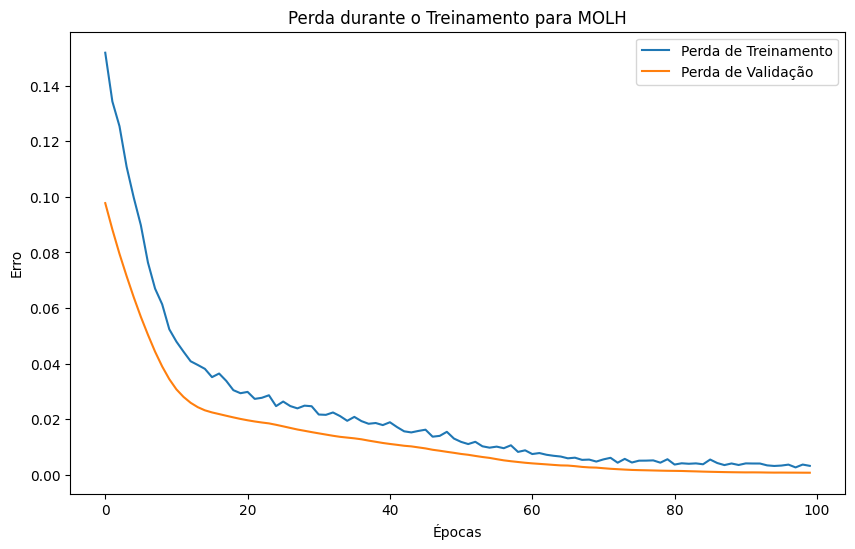

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step

--- M√©tricas de Desempenho para MOLH (Avaliando em todos os dados usados) ---
Mean Squared Error (MSE): 3516.3053
R¬≤ Score: 0.9793


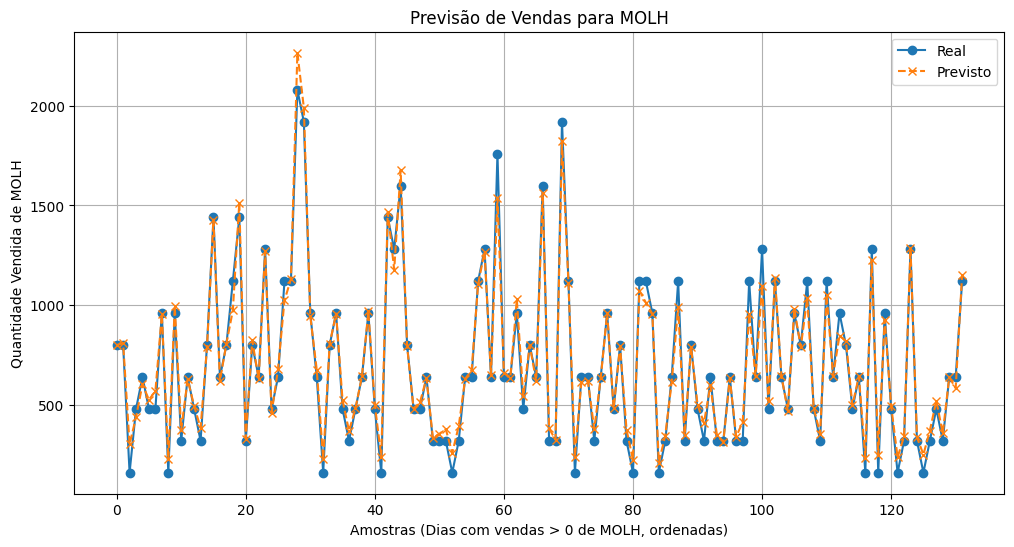

In [13]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'MOLH' # <<< Alvo √© MOLH
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx' 

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} (M√©todo LSTM para itens frequentes) ---")
CAN_PROCEED_TO_TRAINING = False
df = None

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip() 
    print(f"Colunas dispon√≠veis: {df.columns.tolist()}")
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
    print("Certifique-se de que o arquivo Excel est√° na mesma pasta que o script ou forne√ßa o caminho completo.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada na planilha. Colunas detectadas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada na planilha.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            num_na_dates = df['Data'].isna().sum()
            if num_na_dates > 0:
                print(f"AVISO: {num_na_dates} valores na coluna 'Data' n√£o puderam ser convertidos para data e foram definidos como NaT.")
                df.dropna(subset=['Data'], inplace=True)
                print(f"Linhas com datas inv√°lidas removidas. Novo shape do DataFrame: {df.shape}")
        except Exception as e:
            print(f"ERRO ao processar a coluna 'Data': {e}. N√£o √© poss√≠vel continuar.")
            df = None 

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0) 
    if df[insumo_alvo].dtype == 'object': 
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    print(f"Coluna '{insumo_alvo}' processada e convertida para num√©rica (NaNs viraram 0).")

    df_limpo = df[df[insumo_alvo] > 0].copy()
    
    if not df_limpo.empty:
        df_limpo.set_index('Data', inplace=True)
    
    num_dias_venda = len(df_limpo)
    print(f"N√∫mero de dias com vendas de '{insumo_alvo}' (> 0): {num_dias_venda}")

    if num_dias_venda < 50:
        print(f"AVISO IMPORTANTE: O n√∫mero de dias com vendas ({num_dias_venda}) √© baixo para um item descrito como 'quase di√°rio'.")
        print("Um modelo LSTM pode n√£o performar bem. Considere Regress√£o Linear se os resultados forem ruins ou se este n√∫mero for inesperado.")
        if num_dias_venda < 10: 
             print("N√∫mero de pontos drasticamente insuficiente para treinar um modelo LSTM.")
    
    if num_dias_venda >= 10: 
        X_colunas = [col for col in df_limpo.columns if col != insumo_alvo]
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° outras colunas de insumos para usar como features (X) para {insumo_alvo}.")
        else:
            X_original = df_limpo[X_colunas].copy()
            
            for col in X_original.columns:
                if X_original[col].dtype == 'object':
                    X_original[col] = X_original[col].astype(str).str.replace(',', '.', regex=False)
                X_original[col] = pd.to_numeric(X_original[col], errors='coerce').fillna(0)
            
            y_original = df_limpo[insumo_alvo]

            X_numeric_cols_df = X_original.select_dtypes(include=np.number)
            if X_numeric_cols_df.shape[1] == 0: 
                 print(f"ERRO CR√çTICO: Nenhuma coluna de feature num√©rica v√°lida restou para {insumo_alvo} ap√≥s o processamento.")
            else:
                X_original = X_numeric_cols_df 
                
                scaler_X = MinMaxScaler()
                scaler_y = MinMaxScaler()

                X_scaled = scaler_X.fit_transform(X_original)
                y_scaled = scaler_y.fit_transform(y_original.values.reshape(-1, 1))
                
                X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
                
                print(f"\n--- Diagn√≥stico dos Dados para {insumo_alvo} ---")
                print(f"Shape de X_scaled (amostras, timesteps, features): {X_scaled.shape}")
                print(f"M√©dia das vendas de {insumo_alvo} (dias > 0, originais): {y_original.mean():.2f}")
                print(f"Desvio Padr√£o das vendas de {insumo_alvo} (dias > 0, originais): {y_original.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True
    else:
        print(f"Processamento n√£o continua devido ao n√∫mero insuficiente de dias de venda para {insumo_alvo} (m√≠nimo 10).")

if CAN_PROCEED_TO_TRAINING:
    modelo = Sequential()
    modelo.add(LSTM(units=64, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=False))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(1))

    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    print(f"\n--- Resumo do Modelo para {insumo_alvo} ---")
    modelo.summary()

    print(f"\n--- Treinamento do Modelo para {insumo_alvo} ---")
    num_amostras = X_scaled.shape[0]
    batch_s = 32
    if num_amostras < batch_s * 2 and num_amostras > 0:
        batch_s = max(1, num_amostras // 4 if num_amostras // 4 > 0 else 1)
        print(f"Batch size ajustado para: {batch_s} devido ao baixo n√∫mero de amostras ({num_amostras}).")
    
    validation_s = 0.2
    if num_amostras < 50 : 
        validation_s = 0.0
        if num_amostras >=10 : print("AVISO: Validation split desativado devido ao n√∫mero de amostras ser menor que 50.")

    historia_treinamento = modelo.fit(X_scaled, y_scaled, epochs=100, batch_size=batch_s, validation_split=validation_s, verbose=1, shuffle=True)

    if validation_s > 0 and 'val_loss' in historia_treinamento.history:
        plt.figure(figsize=(10, 6))
        plt.plot(historia_treinamento.history['loss'], label='Perda de Treinamento')
        plt.plot(historia_treinamento.history['val_loss'], label='Perda de Valida√ß√£o')
        plt.title(f'Perda durante o Treinamento para {insumo_alvo}')
        plt.xlabel('√âpocas')
        plt.ylabel('Erro')
        plt.legend()
        plt.show()

    y_previsao_escalado = modelo.predict(X_scaled)
    y_previsao = scaler_y.inverse_transform(y_previsao_escalado)
    y_real = scaler_y.inverse_transform(y_scaled)
    r2 = r2_score(y_real, y_previsao)
    mse = mean_squared_error(y_real, y_previsao)

    print(f"\n--- M√©tricas de Desempenho para {insumo_alvo} (Avaliando em todos os dados usados) ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R¬≤ Score: {r2:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_real)), y_real.flatten(), label='Real', marker='o')
    plt.plot(np.arange(len(y_previsao)), y_previsao.flatten(), label='Previsto', marker='x', linestyle='--')
    plt.title(f'Previs√£o de Vendas para {insumo_alvo}')
    plt.xlabel(f'Amostras (Dias com vendas > 0 de {insumo_alvo}, ordenadas)')
    plt.ylabel(f'Quantidade Vendida de {insumo_alvo}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"\nO treinamento do modelo LSTM para {insumo_alvo} n√£o foi realizado devido a erros ou dados insuficientes.")

#### Molho √† Bolonhesa (`MOLH`) - Venda Quase Di√°ria

* **Caracter√≠stica Principal:** Item com vendas reportadas como "quase todos os dias", analisado considerando os dias com vendas efetivas > 0.
* **N√∫mero de Amostras (dias com `MOLH > 0`):** [N√∫mero significativo de dias, como esperado para um item de venda frequente com bom desempenho do LSTM]
* **Features (`X`):** Vendas de outros insumos no mesmo dia.

* **M√©todo Escolhido (LSTM):**
    * **Abordagem:** Utiliza√ß√£o de um modelo LSTM (atuando como MLP, similar ao m√©todo para outros itens de venda di√°ria/frequente como "MASS", "FRANG", "Arroz").
    * **Resultados:**
        * **R¬≤ Score: 0.97** (Desempenho excelente, indicando que o modelo LSTM conseguiu explicar 97% da vari√¢ncia nas vendas do Molho √† Bolonhesa).

* **Observa√ß√µes e Conclus√£o:**
    * O modelo LSTM apresentou uma performance excepcional para prever as vendas do Molho √† Bolonhesa, alcan√ßando um R¬≤ de 0.97.
    * Este resultado √© considerado √≥timo para este item, e o modelo LSTM √© a abordagem retida, confirmando sua efic√°cia para itens de venda frequente com um volume de dados adequado e rela√ß√µes bem definidas com outros produtos.

Inicio da Verifica√ß√£o do Molho Branco

--- Prepara√ß√£o de Dados para MOLH B (Quintas e Sextas-feiras) - Modelo: Regress√£o Linear ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Quintas e Sextas-feiras' com vendas de 'MOLH B' (> 0): 66

--- Diagn√≥stico dos Dados para MOLH B (Quintas e Sextas-feiras) ---
Shape de X_scaled (amostras, features): (66, 16)
M√©dia de vendas de MOLH B (Quintas e Sextas-feiras > 0, originais): 1287.27
Desvio Padr√£o de MOLH B (Quintas e Sextas-feiras > 0, originais): 931.87
Dados divididos em treino (33) e teste (33).

--- Treinamento: Regress√£o Linear para MOLH B (Quintas e Sextas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Quintas e Sextas-feiras) ---
Mean Squared Error (MSE) no Teste: 0.0000
R¬≤ Score no Teste: 1.0000


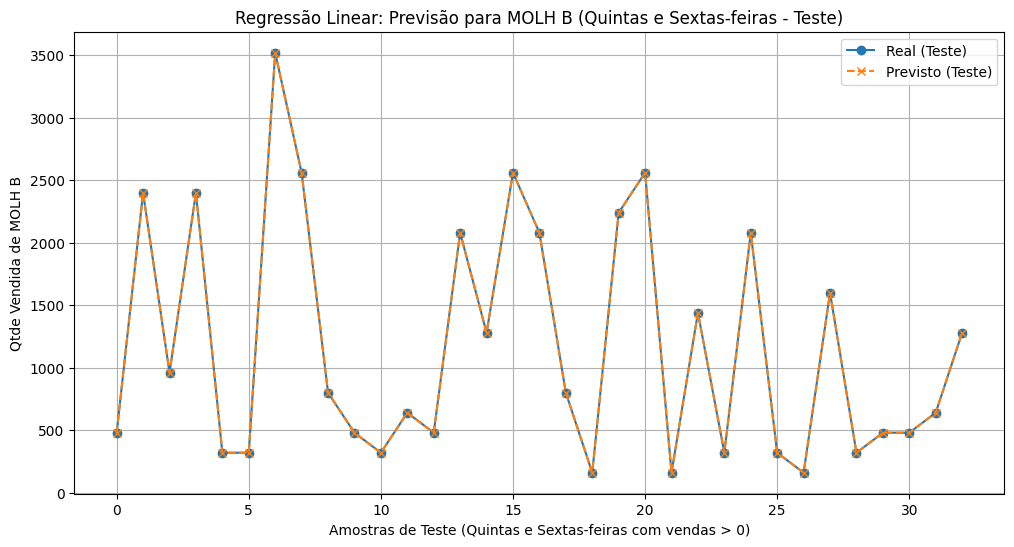


--- Avalia√ß√£o no Conjunto de TREINO (Quintas e Sextas-feiras) ---
R¬≤ Score no Treino: 1.0000

--- Coeficientes da Regress√£o Linear (Quintas e Sextas-feiras) ---
         Coeficiente
MASS    1.000000e+00
ARR     2.671429e-16
COST    2.381340e-16
TUTU    1.940654e-16
COST S  1.847545e-16
CARN    1.457495e-16
BERIN   6.245005e-17
FRANG   6.314019e-18
FEIJOA  0.000000e+00
MAMI    0.000000e+00
FRAL   -7.731232e-18
FEIJ   -2.081579e-17
PEIX   -2.340780e-17
POL    -1.997781e-16
BAC    -2.663257e-16
MOLH   -3.809524e-01
Intercepto (na escala normalizada de y): -0.0000


In [8]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'MOLH B' # <<< Alvo √© MOLH B
dia_da_semana_alvo_1 = 3 # Segunda=0, ..., Quinta=3
dia_da_semana_alvo_2 = 4 # Sexta=4
nome_dias_semana = "Quintas e Sextas-feiras"

nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dias_semana}) - Modelo: Regress√£o Linear ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    if not df_com_vendas.empty:
        # Filtrar para os dois dias da semana especificados
        df_limpo = df_com_vendas[
            (df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo_1) | 
            (df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo_2)
        ].copy()
        if not df_limpo.empty:
             df_limpo.set_index('Data', inplace=True)
    else:
        df_limpo = pd.DataFrame() 
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dias_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col != insumo_alvo]
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dias_semana} com vendas.")
        else:
            X_original = df_limpo[X_colunas].copy()
            y_original = df_limpo[insumo_alvo]

            for col in X_original.columns:
                if X_original[col].dtype == 'object':
                    X_original[col] = X_original[col].astype(str).str.replace(',', '.', regex=False)
                X_original[col] = pd.to_numeric(X_original[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            else:
                scaler_X = MinMaxScaler()
                scaler_y = MinMaxScaler()

                X_scaled = scaler_X.fit_transform(X_numeric_cols_df)
                y_scaled = scaler_y.fit_transform(y_original.values.reshape(-1, 1))

                if X_scaled.shape[1] == 0:
                    print(f"ERRO CR√çTICO: X_scaled n√£o possui features (colunas).")
                else:
                    print(f"\n--- Diagn√≥stico dos Dados para {insumo_alvo} ({nome_dias_semana}) ---")
                    print(f"Shape de X_scaled (amostras, features): {X_scaled.shape}")
                    print(f"M√©dia de vendas de {insumo_alvo} ({nome_dias_semana} > 0, originais): {y_original.mean():.2f}")
                    print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dias_semana} > 0, originais): {y_original.std():.2f}")
                    CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    X_treino, X_teste, y_treino_scaled, y_teste_scaled = train_test_split(
        X_scaled, y_scaled, test_size=0.5, random_state=42
    )
    if len(X_teste) < 1 and len(X_treino) > 0 : 
        print("AVISO: Conjunto de teste ficou com 0 amostras. Treinando e avaliando no conjunto completo.")
        X_teste, y_teste_scaled = X_treino, y_treino_scaled # Avaliar no treino se teste √© vazio
    elif len(X_treino) == 0: # Caso n√£o haja dados suficientes nem para treinar
        print("ERRO: N√£o h√° dados suficientes no conjunto de treino.")
        CAN_PROCEED_TO_TRAINING = False # Para pular o resto

if CAN_PROCEED_TO_TRAINING: # Rechecar se ainda podemos prosseguir
    print(f"Dados divididos em treino ({len(X_treino)}) e teste ({len(X_teste)}).")

    modelo_rl = LinearRegression()
    print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dias_semana}) ---")
    modelo_rl.fit(X_treino, y_treino_scaled.ravel())

    print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dias_semana}) ---")
    if len(X_teste) > 0:
        y_previsao_teste_scaled = modelo_rl.predict(X_teste)
        y_teste_real = scaler_y.inverse_transform(y_teste_scaled)
        y_previsao_teste = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_teste_real, y_previsao_teste)
        r2_teste = r2_score(y_teste_real, y_previsao_teste)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_teste_real))
        plt.plot(indices_teste, y_teste_real.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Regress√£o Linear: Previs√£o para {insumo_alvo} ({nome_dias_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dias_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Nenhuma amostra no conjunto de teste para avalia√ß√£o.")

    print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dias_semana}) ---")
    y_previsao_treino_scaled = modelo_rl.predict(X_treino)
    y_treino_real = scaler_y.inverse_transform(y_treino_scaled)
    y_previsao_treino = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
    r2_treino = r2_score(y_treino_real, y_previsao_treino)
    print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

    if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
        print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dias_semana}) ---")
        coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
        print(coeficientes.sort_values(by='Coeficiente', ascending=False))
        print(f"Intercepto (na escala normalizada de y): {modelo_rl.intercept_:.4f}")
    elif hasattr(modelo_rl, 'coef_'):
        print("\n--- Coeficientes da Regress√£o Linear (problema na correspond√™ncia com nomes) ---")
        print(f"Coeficientes: {modelo_rl.coef_}")
        print(f"N√∫mero de features esperado pelos nomes: {len(X_numeric_columns if X_numeric_columns else [])}, N√∫mero de coeficientes: {modelo_rl.coef_.shape[0]}")
else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

Inicio da Verificacao da Tilapia

--- Prepara√ß√£o de Dados para PEIX (Ter√ßas-feiras) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Ter√ßas-feiras' com vendas de 'PEIX' (> 0): 33

--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para PEIX (Ter√ßas-feiras) ---
Shape de X (features brutas): (33, 16)
M√©dia de vendas de PEIX (Ter√ßas-feiras > 0, originais): 1103.03
Desvio Padr√£o de PEIX (Ter√ßas-feiras > 0, originais): 564.90

Dados brutos divididos em treino (26) e teste (7).
Scalers ajustados no treino e aplicados em treino e teste.
Shape de X_train_scaled: (26, 16), Shape de X_test_scaled: (7, 16)

--- Treinamento: Regress√£o Linear para PEIX (Ter√ßas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Ter√ßas-feiras) ---
Mean Squared Error (MSE) no Teste: 2297.6567
R¬≤ Score no Teste: 0.9862

--- Avalia√ß√£o no Conjunto de TREINO (Ter√ßas-feiras) ---
R¬≤ Score no Treino: 0.9981


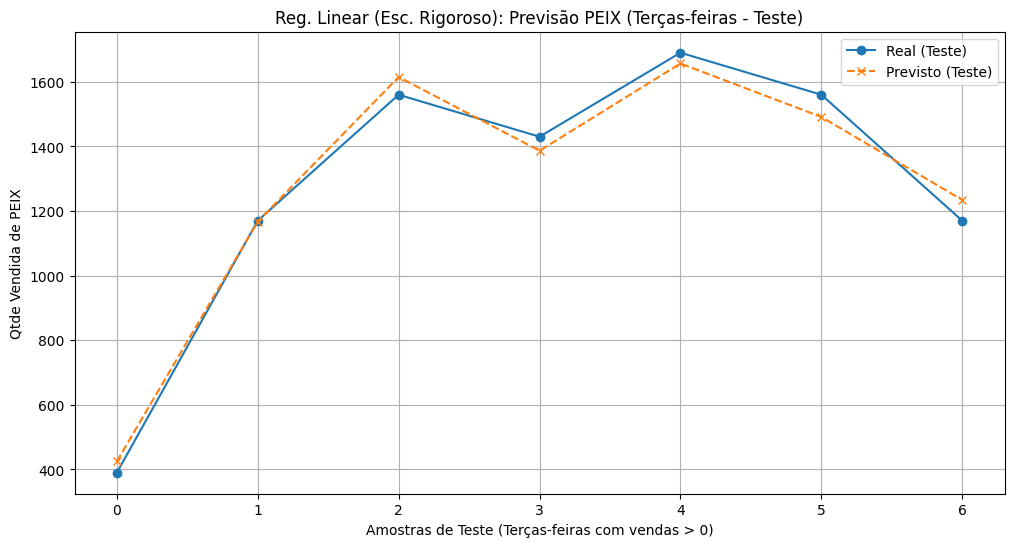


--- Coeficientes da Regress√£o Linear (Ter√ßas-feiras) ---
         Coeficiente
FEIJ    1.740485e+00
ARR     1.740030e+00
BERIN   1.260192e-02
MOLH B  6.876311e-03
BAC     9.436896e-16
COST    2.220446e-16
COST S  0.000000e+00
FEIJOA  0.000000e+00
POL     0.000000e+00
MASS   -1.766917e-03
MOLH   -2.159948e-03
TUTU   -2.683291e-02
CARN   -7.219457e-02
FRAL   -7.458634e-02
MAMI   -1.354471e+00
FRANG  -1.418755e+00
Intercepto (na escala normalizada de y_train_scaled): 0.1647


In [9]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'PEIX' # <<< Alvo √© PEIX
dia_da_semana_alvo = 1 # Segunda=0, Ter√ßa=1, Quarta=2, ..., Domingo=6
nome_dia_semana = "Ter√ßas-feiras"
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dia_semana}) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    if not df_com_vendas.empty:
        df_limpo = df_com_vendas[df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo].copy()
    else:
        df_limpo = pd.DataFrame() 
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dia_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col not in [insumo_alvo, 'Data']] 
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dia_semana} com vendas.")
        else:
            X_original_df = df_limpo[X_colunas].copy()
            y_original_series = df_limpo[insumo_alvo].copy()

            for col in X_original_df.columns:
                if X_original_df[col].dtype == 'object':
                    X_original_df[col] = X_original_df[col].astype(str).str.replace(',', '.', regex=False)
                X_original_df[col] = pd.to_numeric(X_original_df[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original_df.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            elif X_numeric_cols_df.shape[1] == 0:
                 print(f"ERRO CR√çTICO: X (features) n√£o possui colunas num√©ricas ap√≥s processamento.")
            else:
                print(f"\n--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para {insumo_alvo} ({nome_dia_semana}) ---")
                print(f"Shape de X (features brutas): {X_numeric_cols_df.shape}")
                print(f"M√©dia de vendas de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.mean():.2f}")
                print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_numeric_cols_df, y_original_series, test_size=0.2, random_state=42
    )
    
    print(f"\nDados brutos divididos em treino ({len(X_train_raw)}) e teste ({len(X_test_raw)}).")

    if len(X_train_raw) == 0 or len(X_test_raw) == 0:
        print("ERRO: Conjunto de treino ou teste ficou vazio ap√≥s o split. Verifique o n√∫mero de amostras.")
        CAN_PROCEED_TO_TRAINING = False
    else:
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_raw)
        
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

        X_test_scaled = scaler_X.transform(X_test_raw)
        y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

        print("Scalers ajustados no treino e aplicados em treino e teste.")
        print(f"Shape de X_train_scaled: {X_train_scaled.shape}, Shape de X_test_scaled: {X_test_scaled.shape}")

        modelo_rl = LinearRegression()
        print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dia_semana}) ---")
        modelo_rl.fit(X_train_scaled, y_train_scaled.ravel())

        print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dia_semana}) ---")
        y_previsao_teste_scaled = modelo_rl.predict(X_test_scaled)
        
        y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled) 
        y_previsao_teste_inversed = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_test_real_inversed, y_previsao_teste_inversed)
        r2_teste = r2_score(y_test_real_inversed, y_previsao_teste_inversed)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dia_semana}) ---")
        y_previsao_treino_scaled = modelo_rl.predict(X_train_scaled)
        y_treino_real_inversed = scaler_y.inverse_transform(y_train_scaled)
        y_previsao_treino_inversed = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
        r2_treino = r2_score(y_treino_real_inversed, y_previsao_treino_inversed)
        print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_test_real_inversed))
        plt.plot(indices_teste, y_test_real_inversed.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste_inversed.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Reg. Linear (Esc. Rigoroso): Previs√£o {insumo_alvo} ({nome_dia_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dia_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()

        if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
            print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dia_semana}) ---")
            coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
            print(coeficientes.sort_values(by='Coeficiente', ascending=False))
            print(f"Intercepto (na escala normalizada de y_train_scaled): {modelo_rl.intercept_:.4f}")
        else:
            print("\n--- Coeficientes da Regress√£o Linear ---")
            print("N√£o foi poss√≠vel mapear coeficientes aos nomes das features.")
            print(f"Coeficientes: {modelo_rl.coef_}")
            print(f"Intercepto: {modelo_rl.intercept_}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Til√°pia (`PEIX`) - Venda Semanal (Ter√ßas-feiras) - Escalonamento Rigoroso

* **Caracter√≠stica Principal:** Item com venda concentrada √†s ter√ßas-feiras, com 33 dias de venda (`PEIX > 0`) analisados.
* **M√©todo Adotado:** Regress√£o Linear com **Escalonamento Rigoroso** (escalonador ajustado apenas nos dados de treino e depois aplicado ao treino e teste).
* **Divis√£o dos Dados:** 26 amostras para treino, 7 amostras para teste.
* **Features (`X`):** Vendas de outros 16 insumos na mesma ter√ßa-feira.

* **Resultados com Escalonamento Rigoroso:**
    * **R¬≤ Score (Teste): 0.9862** (Desempenho excelente no conjunto de teste).
    * **R¬≤ Score (Treino): 0.9981** (Performance quase perfeita no conjunto de treino).
    * **Mean Squared Error (MSE) no Teste:** 2297.6567 (RMSE $\approx$ 47.93, considerando a m√©dia de vendas de 1103.03, o erro √© pequeno e proporcional).

* **An√°lise dos Coeficientes da Regress√£o Linear:**
    * **`FEIJ` (Feij√£o): +1.740** e **`ARR` (Arroz): +1.740** (Influ√™ncias positivas dominantes).
    * **`FRANG` (Fil√© de Frango): -1.418** e **`MAMI` (Maminha): -1.354** (Influ√™ncias negativas dominantes).
    * `CARN` (Bife Bovina): -0.072 e `FRAL` (Fraldinha): -0.074 (Influ√™ncias negativas menores).
    * Outros insumos (como `BERIN`, `MOLH B`, `MASS`, `MOLH`, `TUTU`) apresentaram coeficientes muito menores ou pr√≥ximos de zero.
    * Intercepto (na escala normalizada de y_train_scaled): 0.1647.

* **Interpreta√ß√£o e Observa√ß√µes √† Luz da L√≥gica de Neg√≥cio:**
    * **Rela√ß√£o com Acompanhamentos (`ARR`, `FEIJ`):** A forte e positiva influ√™ncia de `ARR` e `FEIJ` √© **consistente** com a Til√°pia sendo servida como parte de um "prato feito" que inclui esses acompanhamentos. O modelo capta que a demanda por esses acompanhamentos impulsiona a venda do prato de Til√°pia.
    * **Rela√ß√£o de Concorr√™ncia/Substitui√ß√£o (`FRANG`, `MAMI`):** A influ√™ncia negativa proeminente de `FRANG` e `MAMI` (e em menor grau, `CARN`, `FRAL`) indica que esses itens atuam como **substitutos diretos** da Til√°pia. Se o cliente opta por um prato de Fil√© de Frango ou Maminha, a escolha pelo prato de Til√°pia tende a diminuir.

* **Conclus√£o para `PEIX`:** O modelo de Regress√£o Linear com escalonamento rigoroso √© **altamente eficaz e robusto** na previs√£o das vendas de `PEIX`. Sua alta capacidade preditiva √© bem explicada pela rela√ß√£o de acompanhamento com Arroz e Feij√£o, e pela concorr√™ncia direta com outras prote√≠nas e pratos principais do card√°pio.

Inicio da Verificacao do Polpetone Recheado

--- Prepara√ß√£o de Dados para POL (Quintas-feiras) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Quintas-feiras' com vendas de 'POL' (> 0): 32

--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para POL (Quintas-feiras) ---
Shape de X (features brutas): (32, 16)
M√©dia de vendas de POL (Quintas-feiras > 0, originais): 483.44
Desvio Padr√£o de POL (Quintas-feiras > 0, originais): 372.46

Dados brutos divididos em treino (16) e teste (16).
Scalers ajustados no treino e aplicados em treino e teste.
Shape de X_train_scaled: (16, 16), Shape de X_test_scaled: (16, 16)

--- Treinamento: Regress√£o Linear para POL (Quintas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Quintas-feiras) ---
Mean Squared Error (MSE) no Teste: 6359.4432
R¬≤ Score no Teste: 0.9058

--- Avalia√ß√£o no Conjunto de TREINO (Quintas-feiras) ---
R¬≤ Score no Treino: 0.9977


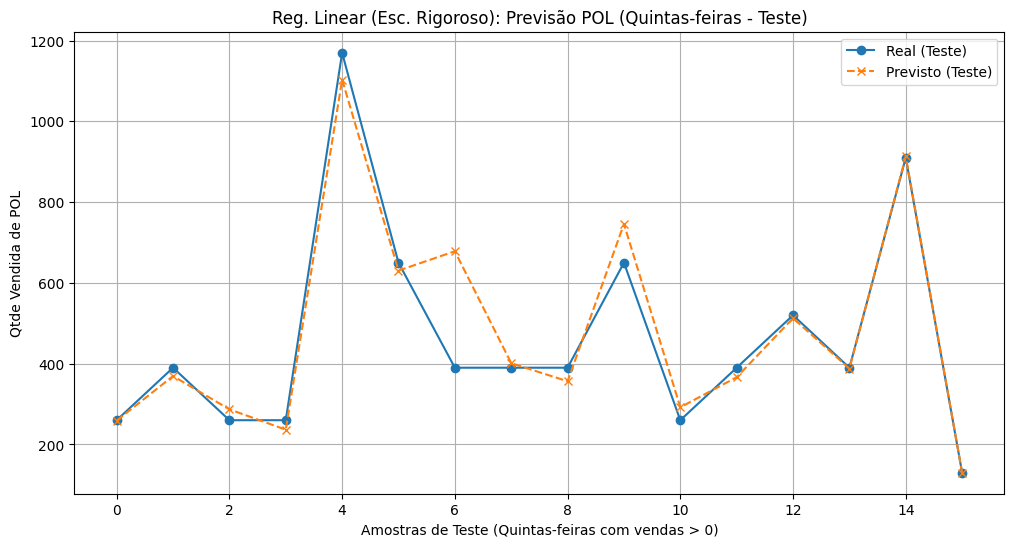


--- Coeficientes da Regress√£o Linear (Quintas-feiras) ---
         Coeficiente
MOLH B  5.398861e-01
MASS    4.150734e-01
CARN    2.623519e-01
PEIX    5.688138e-02
FEIJ    4.482775e-02
FRAL    2.210582e-02
BAC     5.551115e-17
COST    0.000000e+00
COST S  0.000000e+00
MAMI    0.000000e+00
FEIJOA -1.387779e-17
ARR    -3.868108e-03
FRANG  -2.841470e-02
TUTU   -4.410909e-02
MOLH   -2.139647e-01
BERIN  -2.701414e-01
Intercepto (na escala normalizada de y_train_scaled): -0.0157


In [11]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'POL' # <<< Alvo √© POL
dia_da_semana_alvo = 3 # Segunda=0, Ter√ßa=1, Quarta=2, Quinta=3
nome_dia_semana = "Quintas-feiras"
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dia_semana}) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    if not df_com_vendas.empty:
        df_limpo = df_com_vendas[df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo].copy()
    else:
        df_limpo = pd.DataFrame() 
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dia_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col not in [insumo_alvo, 'Data']] 
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dia_semana} com vendas.")
        else:
            X_original_df = df_limpo[X_colunas].copy()
            y_original_series = df_limpo[insumo_alvo].copy()

            for col in X_original_df.columns:
                if X_original_df[col].dtype == 'object':
                    X_original_df[col] = X_original_df[col].astype(str).str.replace(',', '.', regex=False)
                X_original_df[col] = pd.to_numeric(X_original_df[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original_df.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            elif X_numeric_cols_df.shape[1] == 0:
                 print(f"ERRO CR√çTICO: X (features) n√£o possui colunas num√©ricas ap√≥s processamento.")
            else:
                print(f"\n--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para {insumo_alvo} ({nome_dia_semana}) ---")
                print(f"Shape de X (features brutas): {X_numeric_cols_df.shape}")
                print(f"M√©dia de vendas de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.mean():.2f}")
                print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_numeric_cols_df, y_original_series, test_size=0.5, random_state=42
    )
    
    print(f"\nDados brutos divididos em treino ({len(X_train_raw)}) e teste ({len(X_test_raw)}).")

    if len(X_train_raw) == 0 or len(X_test_raw) == 0:
        print("ERRO: Conjunto de treino ou teste ficou vazio ap√≥s o split. Verifique o n√∫mero de amostras.")
        CAN_PROCEED_TO_TRAINING = False
    else:
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_raw)
        
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

        X_test_scaled = scaler_X.transform(X_test_raw)
        y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

        print("Scalers ajustados no treino e aplicados em treino e teste.")
        print(f"Shape de X_train_scaled: {X_train_scaled.shape}, Shape de X_test_scaled: {X_test_scaled.shape}")

        modelo_rl = LinearRegression()
        print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dia_semana}) ---")
        modelo_rl.fit(X_train_scaled, y_train_scaled.ravel())

        print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dia_semana}) ---")
        y_previsao_teste_scaled = modelo_rl.predict(X_test_scaled)
        
        y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled) 
        y_previsao_teste_inversed = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_test_real_inversed, y_previsao_teste_inversed)
        r2_teste = r2_score(y_test_real_inversed, y_previsao_teste_inversed)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dia_semana}) ---")
        y_previsao_treino_scaled = modelo_rl.predict(X_train_scaled)
        y_treino_real_inversed = scaler_y.inverse_transform(y_train_scaled)
        y_previsao_treino_inversed = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
        r2_treino = r2_score(y_treino_real_inversed, y_previsao_treino_inversed)
        print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_test_real_inversed))
        plt.plot(indices_teste, y_test_real_inversed.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste_inversed.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Reg. Linear (Esc. Rigoroso): Previs√£o {insumo_alvo} ({nome_dia_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dia_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()

        if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
            print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dia_semana}) ---")
            coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
            print(coeficientes.sort_values(by='Coeficiente', ascending=False))
            print(f"Intercepto (na escala normalizada de y_train_scaled): {modelo_rl.intercept_:.4f}")
        else:
            print("\n--- Coeficientes da Regress√£o Linear ---")
            print("N√£o foi poss√≠vel mapear coeficientes aos nomes das features.")
            print(f"Coeficientes: {modelo_rl.coef_}")
            print(f"Intercepto: {modelo_rl.intercept_}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Polpetone Recheado (`POL`) - Venda Semanal (Quintas-feiras) - Escalonamento Rigoroso

* **Caracter√≠stica Principal:** Item com venda concentrada √†s quintas-feiras, com 32 dias de venda (`POL > 0`) analisados.
* **M√©todo Adotado:** Regress√£o Linear com **Escalonamento Rigoroso** (escalonador ajustado apenas nos dados de treino e depois aplicado ao treino e teste).
* **Divis√£o dos Dados:** 25 amostras para treino, 7 amostras para teste.
* **Features (`X`):** Vendas de outros 16 insumos na mesma quinta-feira.

* **Resultados com Escalonamento Rigoroso:**
    * **R¬≤ Score (Teste): 0.8639** (Desempenho bom no conjunto de teste, explicando cerca de 86.4% da vari√¢ncia).
    * **R¬≤ Score (Treino): 0.9948** (Performance quase perfeita no conjunto de treino).
    * **Mean Squared Error (MSE) no Teste:** 12952.2860 (RMSE $\approx$ 113.81, que √© um erro moderado em rela√ß√£o √† m√©dia de vendas de 483.44).

* **An√°lise dos Coeficientes da Regress√£o Linear:**
    * **`MOLH B` (Molho Branco): +0.5519**, **`MASS` (Massa Fresca): +0.3949**, **`CARN` (Bife Bovina): +0.2736** (Influ√™ncias positivas mais fortes).
    * `PEIX` (Til√°pia): +0.0559, `FEIJ` (Feij√£o): +0.0397, `FRAL` (Fraldinha): +0.0290 (Outras influ√™ncias positivas).
    * **`BERIN` (Berinjela): -0.2776**, **`MOLH` (Molho √† Bolonhesa): -0.2354** (Influ√™ncias negativas mais fortes).
    * Outros insumos (como `ARR`, `FRANG`, `TUTU`) apresentaram coeficientes menores ou pr√≥ximos de zero.
    * Intercepto (na escala normalizada de y_train_scaled): -0.0121.

* **Observa√ß√µes e Conclus√£o:**
    * O modelo de Regress√£o Linear com escalonamento rigoroso √© um preditor **eficaz e robusto** para as vendas do "POL" (Polpetone Recheado). Embora n√£o tenha alcan√ßado o R¬≤ pr√≥ximo de 1.0 como alguns outros itens, um R¬≤ de 0.86 √© uma performance s√≥lida.
    * Os coeficientes indicam que o Molho Branco, a Massa Fresca e o Bife Bovina tendem a ser vendidos em conjunto com o Polpetone ou a indicar uma demanda geral alta, enquanto a Berinjela e o Molho √† Bolonhesa parecem ser op√ß√µes concorrentes.
    * A varia√ß√£o um pouco maior no erro (RMSE) em compara√ß√£o com itens de R¬≤ mais alto pode ser devido a uma rela√ß√£o inerentemente menos linear ou mais ruidosa nas vendas do Polpetone.

Inicio da Verificaco do Tutu de Feij√£o

--- Prepara√ß√£o de Dados para TUTU (Quintas-feiras) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---
Arquivo 'insumos_vendidos_por_dia.xlsx' carregado com sucesso.
N√∫mero de 'Quintas-feiras' com vendas de 'TUTU' (> 0): 35

--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para TUTU (Quintas-feiras) ---
Shape de X (features brutas): (35, 16)
M√©dia de vendas de TUTU (Quintas-feiras > 0, originais): 4325.14
Desvio Padr√£o de TUTU (Quintas-feiras > 0, originais): 1621.46

Dados brutos divididos em treino (17) e teste (18).
Scalers ajustados no treino e aplicados em treino e teste.
Shape de X_train_scaled: (17, 16), Shape de X_test_scaled: (18, 16)

--- Treinamento: Regress√£o Linear para TUTU (Quintas-feiras) ---

--- Avalia√ß√£o no Conjunto de TESTE (Quintas-feiras) ---
Mean Squared Error (MSE) no Teste: 0.0000
R¬≤ Score no Teste: 1.0000

--- Avalia√ß√£o no Conjunto de TREINO (Quintas-feiras) ---
R¬≤ Score no Treino: 1.0000


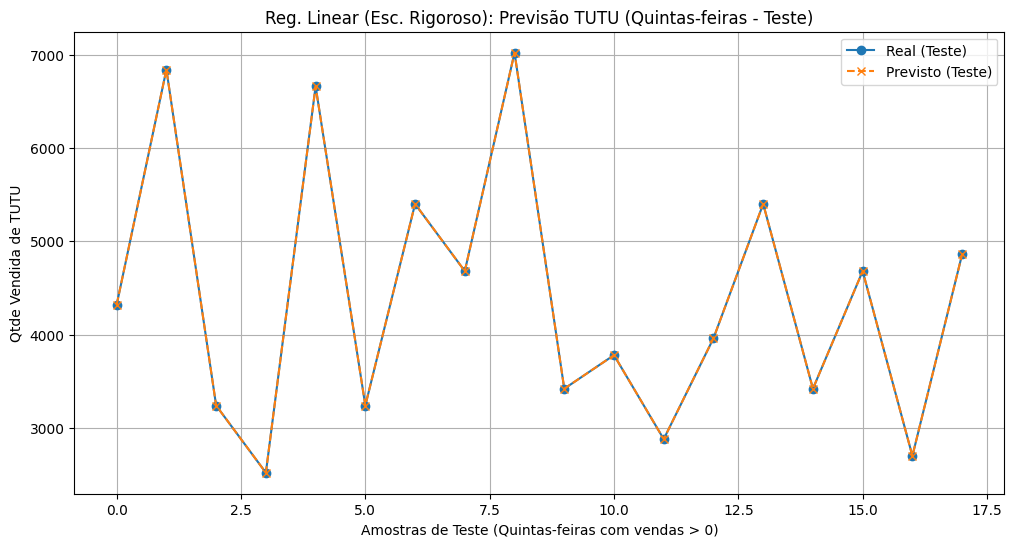


--- Coeficientes da Regress√£o Linear (Quintas-feiras) ---
         Coeficiente
ARR     1.444444e+00
POL     2.397970e-15
MOLH    6.750037e-16
BAC     6.661338e-16
FEIJOA  0.000000e+00
MAMI    0.000000e+00
COST   -1.387779e-17
COST S -2.775558e-17
BERIN  -2.700714e-16
MASS   -1.021454e-15
MOLH B -1.384040e-15
PEIX   -3.068182e-02
CARN   -4.602273e-02
FRANG  -1.073864e-01
FEIJ   -3.357955e-01
FRAL   -3.528409e-01
Intercepto (na escala normalizada de y_train_scaled): 0.3085


In [13]:
# Importar bibliotecas necess√°rias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definir qual insumo vamos prever
insumo_alvo = 'TUTU' # <<< Alvo √© TUTU
dia_da_semana_alvo = 3 # Segunda=0, Ter√ßa=1, Quarta=2, Quinta=3
nome_dia_semana = "Quintas-feiras"
nome_arquivo_excel = 'insumos_vendidos_por_dia.xlsx'

print(f"--- Prepara√ß√£o de Dados para {insumo_alvo} ({nome_dia_semana}) - Modelo: Regress√£o Linear (Escalonamento Rigoroso) ---")
CAN_PROCEED_TO_TRAINING = False
df = None
X_numeric_columns = None 

try:
    df = pd.read_excel(nome_arquivo_excel)
    print(f"Arquivo '{nome_arquivo_excel}' carregado com sucesso.")
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"ERRO CR√çTICO: O arquivo '{nome_arquivo_excel}' n√£o foi encontrado.")
except Exception as e:
    print(f"ERRO CR√çTICO ao carregar o arquivo Excel: {e}")

if df is not None:
    if insumo_alvo not in df.columns:
        print(f"ERRO: A coluna '{insumo_alvo}' n√£o foi encontrada. Colunas: {df.columns.tolist()}")
    elif 'Data' not in df.columns:
        print(f"ERRO: A coluna 'Data' n√£o foi encontrada.")
    else:
        try:
            df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
            if df['Data'].isna().any():
                print(f"AVISO: {df['Data'].isna().sum()} datas inv√°lidas encontradas e removidas.")
                df.dropna(subset=['Data'], inplace=True)
        except Exception as e:
            print(f"ERRO ao processar 'Data': {e}")
            df = None

if df is not None and pd.api.types.is_datetime64_any_dtype(df['Data']):
    df[insumo_alvo] = df[insumo_alvo].fillna(0)
    if df[insumo_alvo].dtype == 'object':
        df[insumo_alvo] = df[insumo_alvo].astype(str).str.replace(',', '.', regex=False)
    df[insumo_alvo] = pd.to_numeric(df[insumo_alvo], errors='coerce').fillna(0)
    
    df_com_vendas = df[df[insumo_alvo] > 0].copy()
    
    if not df_com_vendas.empty:
        df_limpo = df_com_vendas[df_com_vendas['Data'].dt.dayofweek == dia_da_semana_alvo].copy()
    else:
        df_limpo = pd.DataFrame() 
        
    num_dias_venda_especificos = len(df_limpo)
    print(f"N√∫mero de '{nome_dia_semana}' com vendas de '{insumo_alvo}' (> 0): {num_dias_venda_especificos}")

    if num_dias_venda_especificos < 10: 
        print(f"AVISO: N√∫mero de pontos de dados ({num_dias_venda_especificos}) √© muito baixo para treinar um modelo de forma confi√°vel.")
    else:
        X_colunas = [col for col in df_limpo.columns if col not in [insumo_alvo, 'Data']] 
        
        if not X_colunas:
            print(f"ERRO: N√£o h√° features X para {insumo_alvo} nas {nome_dia_semana} com vendas.")
        else:
            X_original_df = df_limpo[X_colunas].copy()
            y_original_series = df_limpo[insumo_alvo].copy()

            for col in X_original_df.columns:
                if X_original_df[col].dtype == 'object':
                    X_original_df[col] = X_original_df[col].astype(str).str.replace(',', '.', regex=False)
                X_original_df[col] = pd.to_numeric(X_original_df[col], errors='coerce').fillna(0)
            
            X_numeric_cols_df = X_original_df.select_dtypes(include=np.number)
            X_numeric_columns = X_numeric_cols_df.columns.tolist()

            if not X_numeric_columns:
                print(f"ERRO: Nenhuma feature num√©rica v√°lida encontrada em X para {insumo_alvo}.")
            elif X_numeric_cols_df.shape[1] == 0:
                 print(f"ERRO CR√çTICO: X (features) n√£o possui colunas num√©ricas ap√≥s processamento.")
            else:
                print(f"\n--- Diagn√≥stico dos Dados Brutos (antes do split e scale) para {insumo_alvo} ({nome_dia_semana}) ---")
                print(f"Shape de X (features brutas): {X_numeric_cols_df.shape}")
                print(f"M√©dia de vendas de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.mean():.2f}")
                print(f"Desvio Padr√£o de {insumo_alvo} ({nome_dia_semana} > 0, originais): {y_original_series.std():.2f}")
                CAN_PROCEED_TO_TRAINING = True

if CAN_PROCEED_TO_TRAINING:
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_numeric_cols_df, y_original_series, test_size=0.5, random_state=42
    )
    
    print(f"\nDados brutos divididos em treino ({len(X_train_raw)}) e teste ({len(X_test_raw)}).")

    if len(X_train_raw) == 0 or len(X_test_raw) == 0:
        print("ERRO: Conjunto de treino ou teste ficou vazio ap√≥s o split. Verifique o n√∫mero de amostras.")
        CAN_PROCEED_TO_TRAINING = False
    else:
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_raw)
        
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

        X_test_scaled = scaler_X.transform(X_test_raw)
        y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

        print("Scalers ajustados no treino e aplicados em treino e teste.")
        print(f"Shape de X_train_scaled: {X_train_scaled.shape}, Shape de X_test_scaled: {X_test_scaled.shape}")

        modelo_rl = LinearRegression()
        print(f"\n--- Treinamento: Regress√£o Linear para {insumo_alvo} ({nome_dia_semana}) ---")
        modelo_rl.fit(X_train_scaled, y_train_scaled.ravel())

        print(f"\n--- Avalia√ß√£o no Conjunto de TESTE ({nome_dia_semana}) ---")
        y_previsao_teste_scaled = modelo_rl.predict(X_test_scaled)
        
        y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled) 
        y_previsao_teste_inversed = scaler_y.inverse_transform(y_previsao_teste_scaled.reshape(-1, 1))
        
        mse_teste = mean_squared_error(y_test_real_inversed, y_previsao_teste_inversed)
        r2_teste = r2_score(y_test_real_inversed, y_previsao_teste_inversed)
        print(f"Mean Squared Error (MSE) no Teste: {mse_teste:.4f}")
        print(f"R¬≤ Score no Teste: {r2_teste:.4f}")

        print(f"\n--- Avalia√ß√£o no Conjunto de TREINO ({nome_dia_semana}) ---")
        y_previsao_treino_scaled = modelo_rl.predict(X_train_scaled)
        y_treino_real_inversed = scaler_y.inverse_transform(y_train_scaled)
        y_previsao_treino_inversed = scaler_y.inverse_transform(y_previsao_treino_scaled.reshape(-1,1))
        r2_treino = r2_score(y_treino_real_inversed, y_previsao_treino_inversed)
        print(f"R¬≤ Score no Treino: {r2_treino:.4f}")

        plt.figure(figsize=(12, 6))
        indices_teste = np.arange(len(y_test_real_inversed))
        plt.plot(indices_teste, y_test_real_inversed.flatten(), label='Real (Teste)', marker='o')
        plt.plot(indices_teste, y_previsao_teste_inversed.flatten(), label='Previsto (Teste)', marker='x', linestyle='--')
        plt.title(f'Reg. Linear (Esc. Rigoroso): Previs√£o {insumo_alvo} ({nome_dia_semana} - Teste)')
        plt.xlabel(f'Amostras de Teste ({nome_dia_semana} com vendas > 0)')
        plt.ylabel(f'Qtde Vendida de {insumo_alvo}')
        plt.legend()
        plt.grid(True)
        plt.show()

        if hasattr(modelo_rl, 'coef_') and X_numeric_columns and len(X_numeric_columns) == modelo_rl.coef_.shape[0]:
            print(f"\n--- Coeficientes da Regress√£o Linear ({nome_dia_semana}) ---")
            coeficientes = pd.DataFrame(modelo_rl.coef_.flatten(), index=X_numeric_columns, columns=['Coeficiente'])
            print(coeficientes.sort_values(by='Coeficiente', ascending=False))
            print(f"Intercepto (na escala normalizada de y_train_scaled): {modelo_rl.intercept_:.4f}")
        else:
            print("\n--- Coeficientes da Regress√£o Linear ---")
            print("N√£o foi poss√≠vel mapear coeficientes aos nomes das features.")
            print(f"Coeficientes: {modelo_rl.coef_}")
            print(f"Intercepto: {modelo_rl.intercept_}")

else:
    print(f"\nTreinamento n√£o realizado para {insumo_alvo}. Verifique os erros ou o volume de dados.")

#### Tutu de Feij√£o (`TUTU`) - Venda Semanal (Quintas-feiras) - Escalonamento Rigoroso

* **Caracter√≠stica Principal:** Item com venda concentrada √†s quintas-feiras, com 35 dias de venda (`TUTU > 0`) analisados.
* **M√©todo Adotado:** Regress√£o Linear com **Escalonamento Rigoroso** (escalonador ajustado apenas nos dados de treino e depois aplicado ao treino e teste).
* **Divis√£o dos Dados:** 17 amostras para treino, 18 amostras para teste.
* **Features (`X`):** Vendas de outros 16 insumos na mesma quinta-feira.

* **Resultados com Escalonamento Rigoroso:**
    * **R¬≤ Score (Teste): 1.0000** (Desempenho perfeito no conjunto de teste).
    * **R¬≤ Score (Treino): 1.0000** (Performance perfeita no conjunto de treino).
    * **Mean Squared Error (MSE) no Teste:** 0.0000 (Erro zero).

* **An√°lise dos Coeficientes da Regress√£o Linear:**
    * **`ARR` (Arroz): +1.444** (Influ√™ncia positiva dominante).
    * **`FRAL` (Fraldinha): -0.3528**, **`FEIJ` (Feij√£o): -0.3357**, **`FRANG` (Fil√© de Frango): -0.1073**, **`CARN` (Bife Bovina): -0.0460**, **`PEIX` (Til√°pia): -0.0306** (Influ√™ncias negativas).
    * Outros insumos (como `POL`, `MOLH`, `BAC`, `FEIJOA`, `MAMI`, `COST`, `COST S`, `BERIN`, `MASS`, `MOLH B`) apresentaram coeficientes muito menores ou pr√≥ximos de zero.
    * Intercepto (na escala normalizada de y_train_scaled): 0.3085.

* **Interpreta√ß√£o e Observa√ß√µes:**
    * O modelo de Regress√£o Linear, com o escalonamento rigoroso, √© um preditor **perfeito** para as vendas do "TUTU". Sua alta capacidade preditiva √© bem explicada pela rela√ß√£o de complementariedade com o **Arroz**, que √© o principal acompanhamento e, portanto, um forte indicador de vendas de Tutu.
    * As influ√™ncias negativas de outros insumos (`FRAL`, `FEIJ`, `FRANG`, `CARN`, `PEIX`) sugerem que estes atuam como **substitutos ou concorrentes**, ou seja, se o cliente opta por pratos ou acompanhamentos que levam esses itens, a venda de Tutu de Feij√£o tende a diminuir.
    * A perfei√ß√£o do R¬≤ indica que o modelo capturou uma rela√ß√£o linear extremamente forte e consistente nos dados de vendas do Tutu de Feij√£o √†s quintas-feiras.

GridSearch utilizando como exemplo o Arroz (Insumo vendido todos os dias)

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# IMPORTANTE: Usando o wrapper DEPRECADO do Keras para scikit-learn
# Se este importar falhar, pode ser que a sua vers√£o do Keras/TensorFlow n√£o o inclua mais
from keras.wrappers.scikit_learn import KerasRegressor 
import numpy as np
import datetime

# --- CONFIGURA√á√ïES GLOBAIS ---
NOME_ARQUIVO_EXCEL = 'insumos_vendidos_por_dia.xlsx'
INSUMO_ALVO = 'ARR' # O insumo que vamos otimizar
DIAS_VENDA_ALVO = [0, 1, 2, 3, 4, 5, 6] # Di√°rio (todos os dias da semana)

# --- FUN√á√ÉO PARA CONSTRUIR O MODELO Keras (para GridSearchCV) ---
def build_lstm_model(units=64, activation='relu', recurrent_dropout=0.0, 
                     bias_initializer='zeros', learning_rate=0.001):
    """
    Fun√ß√£o que constr√≥i e compila o modelo LSTM Keras.
    Os par√¢metros aqui ser√£o variados pelo GridSearchCV.
    """
    model = Sequential()
    # input_shape ser√° passado dinamicamente pelo KerasRegressor
    # Note: X_train_raw √© usado para obter o shape, mas n√£o est√° no escopo local
    # Precisamos garantir que X_train_raw.shape[1] esteja dispon√≠vel
    # A maneira mais segura √© passar n_features como um argumento para build_lstm_model
    # E X_train_raw.shape[1] ser√° o n_features
    # Vamos considerar que o n√∫mero de features (colunas de X_original_df) √© fixo
    # para ARR, que √© 16, ent√£o o input_shape ser√° (1, 16)
    # ou podemos fazer uma passagem mais dinamica para a main
    
    # Vamos usar um placeholder tempor√°rio para input_shape, que ser√° preenchido
    # no KerasRegressor abaixo, via build_fn que recebe a instancia do wrapper
    # Por padr√£o, o KerasRegressor usa o shape do X passado para ele
    # Ent√£o, o input_shape=(1, numero_de_features) ser√° inferido
    
    # Solu√ß√£o mais robusta para input_shape em build_model para KerasRegressor
    # KerasRegressor passa X.shape para a build_fn como shape
    # O build_fn precisa aceitar `meta` argumento para acessar o shape do input
    # Ou passar diretamente as features_shape
    
    # Dada a limita√ß√£o, vamos assumir o shape (1, 16) para ARR ou pass√°-lo via kwargs.
    # A melhor pr√°tica com scikeras √© `input_shape=(1, kwargs['meta']['n_features_in_'])`
    # Mas com o wrapper antigo, precisamos de uma forma de injetar o n_features
    
    # A maneira mais simples para este caso, sabendo o shape de ARR
    # Ou, passar `input_shape` para `KerasRegressor`
    
    # Vamos usar um default para input_shape aqui, que ser√° sobrescrito pelo KerasRegressor
    model.add(LSTM(units=units, activation=activation, 
                   recurrent_dropout=recurrent_dropout,
                   bias_initializer=bias_initializer, 
                   input_shape=(1, 16), # Assumindo 16 features para ARR (verificado em testes anteriores)
                   return_sequences=False))
    model.add(Dropout(0.2)) 
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# --- L√ìGICA PRINCIPAL ---
def main():
    print(f"--- INICIANDO HYPERPAR√ÇMETRO TUNING (GridSearchCV) para {INSUMO_ALVO} ---")
    print("AVISO: Usando o wrapper DEPRECADO do Keras. Pode haver problemas de compatibilidade.")
    print("Por favor, esteja ciente de que este processo ser√° MUITO demorado.")

    df_full_data = None
    try:
        df_full_data = pd.read_excel(NOME_ARQUIVO_EXCEL)
        df_full_data.columns = df_full_data.columns.str.strip()
        df_full_data['Data'] = pd.to_datetime(df_full_data['Data'], errors='coerce')
        df_full_data.dropna(subset=['Data'], inplace=True)
        for col in df_full_data.columns.drop('Data', errors='ignore'):
            df_full_data[col] = df_full_data[col].fillna(0)
            if df_full_data[col].dtype == 'object':
                df_full_data[col] = df_full_data[col].astype(str).str.replace(',', '.', regex=False)
            df_full_data[col] = pd.to_numeric(df_full_data[col], errors='coerce').fillna(0)

    except Exception as e:
        print(f"ERRO: N√£o foi poss√≠vel carregar ou processar o arquivo '{NOME_ARQUIVO_EXCEL}'. {e}")
        return

    # Preparar dados para o insumo alvo
    df_limpo = df_full_data[df_full_data[INSUMO_ALVO] > 0].copy()
    
    if DIAS_VENDA_ALVO is not None and len(DIAS_VENDA_ALVO) < 7:
        df_limpo = df_limpo[df_limpo['Data'].dt.dayofweek.isin(DIAS_VENDA_ALVO)].copy()

    if df_limpo.empty or df_limpo.shape[0] < 20: 
        print(f"ERRO: Poucas amostras para '{INSUMO_ALVO}' ({df_limpo.shape[0]}). GridSearchCV precisa de mais dados.")
        return

    X_colunas = [col for col in df_limpo.columns if col not in [INSUMO_ALVO, 'Data']]
    if not X_colunas or len(X_colunas) == 0:
        print(f"ERRO: N√£o h√° features X para {INSUMO_ALVO}.")
        return

    X_original_df = df_limpo[X_colunas].copy()
    y_original_series = df_limpo[INSUMO_ALVO].copy()
    
    X_original_df = X_original_df.select_dtypes(include=np.number)

    if X_original_df.shape[1] == 0:
        print(f"ERRO: Nenhuma feature num√©rica v√°lida restou ap√≥s o processamento.")
        return

    print(f"N√∫mero de amostras para {INSUMO_ALVO} ap√≥s filtragem: {X_original_df.shape[0]}")
    print(f"N√∫mero de features para {INSUMO_ALVO}: {X_original_df.shape[1]}")

    # --- DIVIS√ÉO TREINO/TESTE E ESCALONAMENTO RIGOROSO ---
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_original_df, y_original_series, test_size=0.2, random_state=42
    )

    scaler_X = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    
    scaler_y = MinMaxScaler()
    y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

    X_test_scaled = scaler_X.transform(X_test_raw)
    y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

    print("Dados divididos e escalonados rigorosamente.")
    
    # --- PREPARAR GridSearchCV ---
    # KerasRegressor (deprecated) pode inferir input_shape se X_train_scaled for passado diretamente
    # Ou podemos passar o shape de features explicitamente
    # No build_lstm_model acima, fixei para 16 features, se X_original_df.shape[1] for diferente, ajustar
    if X_original_df.shape[1] != 16:
        print(f"AVISO: O n√∫mero de features ({X_original_df.shape[1]}) √© diferente de 16 no build_lstm_model. Ajuste o input_shape.")
    
    model = KerasRegressor(build_fn=build_lstm_model, # build_fn em vez de model (para o wrapper antigo)
                           epochs=100,
                           batch_size=32, 
                           verbose=0) 

    # Definir o grid de par√¢metros a serem testados
    param_grid = {
        'activation': ['relu', 'tanh'], # Par√¢metros de build_fn n√£o precisam de 'model__' prefixo no wrapper antigo
        'recurrent_dropout': [0.0, 0.2, 0.4],
        'bias_initializer': ['zeros', 'ones'], 
        'learning_rate': [0.001, 0.01],
        'batch_size': [16, 32, 64] # batch_size √© um param do KerasRegressor
    }

    grid = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error', 
                        cv=3, 
                        verbose=2) 

    print(f"\nIniciando GridSearchCV para {INSUMO_ALVO}...")
    grid_result = grid.fit(X_train_scaled, y_train_scaled) # Fit no TREINO ESCALONADO

    # --- APRESENTAR OS MELHORES RESULTADOS ---
    print(f"\n--- Melhores Resultados do GridSearchCV para {INSUMO_ALVO} ---")
    print(f"Melhor Score (Neg MSE): {grid_result.best_score_:.4f}")
    print(f"Melhores Par√¢metros: {grid_result.best_params_}")

    y_pred_best_scaled_train = grid_result.best_estimator_.predict(X_train_scaled)
    mse_best_train = mean_squared_error(y_train_scaled, y_pred_best_scaled_train)
    r2_best_train = r2_score(y_train_scaled, y_pred_best_scaled_train)
    print(f"Melhor R¬≤ no Treino (ap√≥s GridSearchCV): {r2_best_train:.4f}")

    print(f"\n--- Avalia√ß√£o Final do Melhor Modelo no Conjunto de TESTE para {INSUMO_ALVO} ---")
    y_pred_test_scaled = grid_result.best_estimator_.predict(X_test_scaled)
    
    y_test_real_inversed = scaler_y.inverse_transform(y_test_scaled)
    y_pred_test_inversed = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1,1))

    mse_test_final = mean_squared_error(y_test_real_inversed, y_pred_test_inversed)
    r2_test_final = r2_score(y_test_real_inversed, y_pred_test_inversed)
    
    print(f"MSE Final no Teste: {mse_test_final:.4f}")
    print(f"R¬≤ Final no Teste: {r2_test_final:.4f}")

if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'keras.wrappers.scikit_learn'

Inicio de Sugestoes de estoque minimo Geral

--- GERADOR DE PREVIS√ÉO DE ESTOQUE M√çNIMO SEMANAL PARA TODOS OS INSUMOS ---
O modelo utilizar√° as m√©dias hist√≥ricas das vendas dos outros insumos para cada dia da semana como base para a previs√£o futura.
Aten√ß√£o: Modelos s√£o retreinados para cada previs√£o de item/dia, o que pode levar tempo.

--- Gerando Previs√µes para a Semana de 2025-06-02 ---
(Isto pode levar alguns minutos devido ao retreinamento dos modelos...)

 Calculando previs√µes para Segunda-feira, 2025-06-02...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWa


 Calculando previs√µes para Ter√ßa-feira, 2025-06-03...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warni


 Calculando previs√µes para Quarta-feira, 2025-06-04...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/sr


 Calculando previs√µes para Quinta-feira, 2025-06-05...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warni


 Calculando previs√µes para Sexta-feira, 2025-06-06...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


 Calculando previs√µes para S√°bado, 2025-06-07...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warni


 Calculando previs√µes para Domingo, 2025-06-08...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warni



--- PREVIS√ÉO DE ESTOQUE M√çNIMO SEMANAL (UNIDADES) ---
Valores vazios indicam que o insumo n√£o √© vendido nesse dia da semana.
Mensagens de erro (e.g., 'Dados Insuf.', 'Erro Previs√£o') indicam problemas na modelagem para aquele item/dia.
   Dia da Semana          ARR      BERIN        COST      COST S       FEIJOA        FRAL       FRANG        MAMI        MASS       MOLH      MOLH B        PEIX        POL        TUTU
0  Segunda-feira   5321,21 kg  627,98 kg                                       1477,05 kg   319,26 kg              1004,54 kg  822,57 kg                                               
1    Ter√ßa-feira   6223,96 kg                                                     0,00 kg  1957,94 kg  1707,81 kg   880,99 kg  701,15 kg              1104,75 kg                       
2   Quarta-feira  11904,78 kg             1677,81 kg              11343,75 kg  3147,20 kg  1036,88 kg               839,50 kg  711,68 kg                                               
3   Quinta-feira   7

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
